In [2]:
%matplotlib inline
print "Press below for code fields to appear/hide"
from IPython.display import HTML

hide_me = ''
HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      el = $(this).find('.cm-variable:first');
      if (id == 0 || el.text() == 'hide_me') {
        $(this).hide();
      }
    });
    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {
      $(this).show();
    });
    $('div.output_prompt').css('opacity', 1);
  }
  code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input style="opacity:0" type="submit" value="Click here to toggle on/off the raw code."></form>''')
#For Python 3.0:
#Worked for me on iPython 3.1.0 if I put it inside code cell. I replaced the
#<form action ... > ... </form> with simple HTML like.
#The raw code for this IPython notebook is by default hidden for easier reading.
#To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.


Press below for code fields to appear/hide


Modeling, simulation and analysis with Virtual Epileptic Patient module of TVB

# The 6D (full model) Epileptor:


\begin{eqnarray}
                \dot{x}_{i1} &=& y_{1i} - f_{1}(x_{i1}, x_{i2}) - z_i + I_{ext1_i} \\
                \dot{y}_{i1} &=& yc_{1i} - d_{i} x_{i1}^{2} - y_{i1} \\
                \dot{z}_i &=& 1/ \tau_{0_{i}}( f_{zx}(x_{i1}, -x_{0_i}) - f_{zz}(z_i) - K_i \sum_{j=1}^Nw_{ij}(x_{j1}-x_{i1}) )\\
                \dot{x}_{i2} &=& -y_{i2} + x_{i2} - x_{i2}^{3} + I_{ext2_i} + 2 g_i - 0.3 (z_i-3.5) \\
                \dot{y}_{i2} &=& 1 / \tau_{2_i}(-y_{i2} + f_{2}(x_{i2}))\\
                \dot{u}_i &=& -\gamma_i (u_i - 0.1 (x_{i1}-5/3))
\end{eqnarray}

where:

\begin{eqnarray}
                f_{1}(x_{i1}, x_{i2}) &=&
                \begin{cases}
                a_{i}x_{i1}^{3} - b_{i}x_{i1}^2, & \text{if } x_{i1} <0\\
                (x_{i2} - 0.6(z_i-4)^2 -slope_i) x_{i1} &\text{if }x_{i1} \geq 0\\
                \end{cases} \\
                f_{zx}(x_{i1},x_{0_i}) &=&
                \begin{cases}
                4 (x_{i1} - x_{0_i}) & \text{linear} \\
                3 (1+e^{-10(x_{i1}+0.5)}))^{-1} - x_{0_i} & \text{sigmoidal} \\
                \end{cases}  \\
                f_{zz}(z_i) &=&
                \begin{cases}
                z_i+0.1 z_i^{7} & \text{if } x_i<0 \\
                z_i & \text{if } x_i \geq 0 \\
                \end{cases} \\
                f_{2}(x_{i2}) &=&
                \begin{cases}
                0 & \text{if } x_{i2} <-0.25\\
                s_{i}(x_{i2} + 0.25) & \text{if } x_{i2} \geq -0.25 \\
                \end{cases}
\end{eqnarray}  

with the default parameter values $a_{i} = 1$, $b_{i} = 3$, $d_{i} = 5$, $s_{i} = 6$, $slope_{i} = 0$, $\gamma_{i} = 0.1$, $I_{ext1_{i}} = 3.1$, $I_{ext2_{i}} = 0.45$, $K_{i} \in [0.0, ]$ with $K_{i} = 10/NumberOfRegions$ as a good choice (i.e., weak coupling), $\tau_{0_i} = 2857$ (but $\tau_{0_i} \in [10, 400000)$ for realistic seizures), $\tau_{2_i} = 10$, and the general time scale somewhere within $\tau_{1_i} \in [0.5, 1.0]$ for most cases.




# The 2D Epileptor (used for linear stability analysis, equilibria calculation, and most of data fitting):

\begin{eqnarray}
                \dot{x}_{i1} &=& y_{c_i} - f_{x1}(x_{i1}, z_i) - z_i + I_{ext1_i} \\
                \dot{z}_i &=& 1/ \tau_{0_{i}}( f_{z}(x_{i1},x_{0_i}) - z_i - K_i \sum_{j=1}^Nw_{ij}(x_{j1}-x_{i1}) )\\
\end{eqnarray}

where:

\begin{eqnarray}
                f_{x1}(x_{i1}, z_i) &=&
                \begin{cases}
                 a_{i}x_{i1}^{3} +(d_{i}-b_{i})x_{i1}^2 & \text{if } x_{i1} <0\\
                (5x_{i1} - 0.6(z_i-4)^2 -slope_i) x_{i1} &\text{if }x_{i1} \geq 0\\
                \end{cases}\\
                f_{z}(x_{i1},x_{0_i}) &=&
                \begin{cases}
                4 (x_{i1} - x_{0_i}) & \text{linear} \\
                3 (1+e^{-10(x_{i1}+0.5)}))^{-1} - x_{0_i} & \text{sigmoidal} \\
                \end{cases} \\
\end{eqnarray}


For the default parameters, and in the absence of coupling ($K_i=0$), there is an equilibrium point (i.e., $\dot{x_{i1}}=0$ ,  $\dot{z}_i=0$ ) at $x_{i1}^{eq}=-4/3$ for $x_{0_i}ˆ{cr}=-2.06$, whereas $x_{i1}ˆ{eq}=-5/3$ for $x_{0_i}=-2.46$, taken as default "healthy" values.

# Hypothesis definition 
Assuming default parameters, we can define a clinical hypothesis
in terms of 
___Epileptogenicity___ $E_i\in[0,1]$, defined as $E_i=3x_{i1}^{eq}+5$ ,
or
___Excitability___ $x_{0_i}$ scaled accordingly so that x0 $x_{0_i}ˆ{cr} = 1.0$
and combinations thereof (see below)

# Equilibria calculation for linear stability analysis

The 2D Epileptor is used with $x_{i1}<0$

## Epileptogenicity -> Equilibrium 
Starting from Epileptogenicity $E_i$, we get $x_{i1}^{eq}=(E_i-5)/3$

and, then, from $\dot{x}_{i1}=0$, we calculate $z_{i}^{eq}=y_{c_i}Equilibrium-a_ix_{i1}^{3} -(d_i-b_i)x_{i1}^2+ I_{ext1_i}$

and, finally, from $\dot{z}_{i}=0$, we calculate $x_{0_i}=(4x_{i1}^{eq}-z_{i}^{eq}-K_i\sum_{j=1}^Nw_{ij}(x_{j1}^{eq}-x_{i1}^{eq})))/4$

## Excitability -> Equilibrium point
### or
## Mixed case: (Epileptogenicity & Excitability) -> Equilibrium point
A system of nonlinear or linear (after Taylor expansion) equations has to be solved computationally or analytically, respectively.

# Linear Stability Analysis (LSA)
In order to find the expression of the 2D Epileptor on the slow $z_i$ manifold, we approximate the cubic term $x_{i1}^3$ of $\dot{x}_{i1}$ with a Taylor series expansion of second order at the point $x'_{i1}=x'_{i1}ˆ(eq)=-4/3$, and then, solve $\dot{x}_{i1}$ for $x_{i1}$ to get:
$$x_{i1} = F_{x_1}(z_i) = -4/3 - 1/2\sqrt{2(z_i - y_{c_i} - I_{ext1_i})+64/27}$$

and by substitution into $\dot{z_{i}}$, we get:
$$\dot{z_{i}} = 1/ \tau_{0_{i}}( 4 (F_{x_1}(z_i) -x_{0_i}) - z_i - K_i \sum_{j=1}^Nw_{ij}(F_{x_1}(z_j)-F_{x_1}(z_i)) )$$

Besides, we also need the derivative of $F_{x_1}(z_i)$ to $z_i$:
$$\frac{dF_{x_1}}{dz_i}(z_i) = F'_{x_1} =  -\frac{1}{2\sqrt{2(z_i - y_{c_i} - I_{ext1_i})+64/27}}$$

at which point we can calculate the Jacobian of $\dot{z_{i}}$ as:

\begin{eqnarray}
                \mathbf{J}^{NxN} &=&
                \begin{cases}
                [F'_{x_1}(z_i) (4+K_i\sum_{j \neq i}w_{ij})-1] & \text{ for } i = j \\
                [-K_{i}w_{ij}F'_{x_1}(z_i)] & \text{ for } i \neq j  \\
                \end{cases} \\
\end{eqnarray}

Then, we perform eigenvalue decomposition of the determinant of J at the equilibrium point calculated according to an hypothesis, as described above:
$$|\mathbf{J}(z_i^{eq})-\lambda \mathbf{I}^{NxN}|=0$$

We sort the resulting eigenvalues $\lambda_i$ and eigenvectors $$\mathbf{V}_i$$ in order of decreasing (negative) eigenvalues, and we use up to the $N_s$ first eigenvectors to calculate an index of seizure ___Propagation Strength___, as the absolute sum of the respective eigenvectors:
$$\mathbf{PS}_i = \sum_{j=1...N_s}|\mathbf{V}_i|$$
potentially weighted by their eigenvalues.

# Demonstrating the Virtual Epileptic Patient TVB module


### Basic imports


In [3]:
# hide_me
import os
import numpy as np
from tvb_epilepsy.base.utils.log_error_utils import initialize_logger
from tvb_epilepsy.base.h5_model import convert_to_h5_model, read_h5_model

### Basic configurations and logger initialization
(the respective flags and/or directories can be set explicity instead of being imported via the configuration files): 

In [4]:
# hide_me
from tvb_epilepsy.base.constants.module_constants import TVB, DATA_MODE
from tvb_epilepsy.base.constants.configurations import FOLDER_VEP, FOLDER_RES, SHOW_FLAG, SAVE_FLAG, FOLDER_LOGS, FOLDER_FIGURES, FIG_FORMAT
logger = initialize_logger(__name__, FOLDER_LOGS)
print str(logger)

### Read TVB connectivity data and create a VEP head object

In [5]:
# hide_me
from tvb_epilepsy.tvb_api.readers_tvb import TVBReader as Reader
reader = Reader()
PATIENT = os.path.join(FOLDER_VEP, "TVB3")
logger.info("Reading connectivity from: " + PATIENT)
print str("Reading connectivity from: " + PATIENT)
head = reader.read_head(FOLDER_VEP, 
                        connectivity_file=os.path.join(PATIENT, "TVB/connectivity.zip"))

### Read directly a VEP head object

In [6]:
# hide_me
from tvb_epilepsy.custom.readers_custom import CustomReader as Reader
reader = Reader()
PATIENT_VIRTUAL_HEAD=os.path.join(PATIENT, "Head")
logger.info("Reading a VEP head from: " + PATIENT_VIRTUAL_HEAD)
print str("Reading a VEP head from: " + PATIENT_VIRTUAL_HEAD)
head = reader.read_head(PATIENT_VIRTUAL_HEAD)

### Plot VEP head:

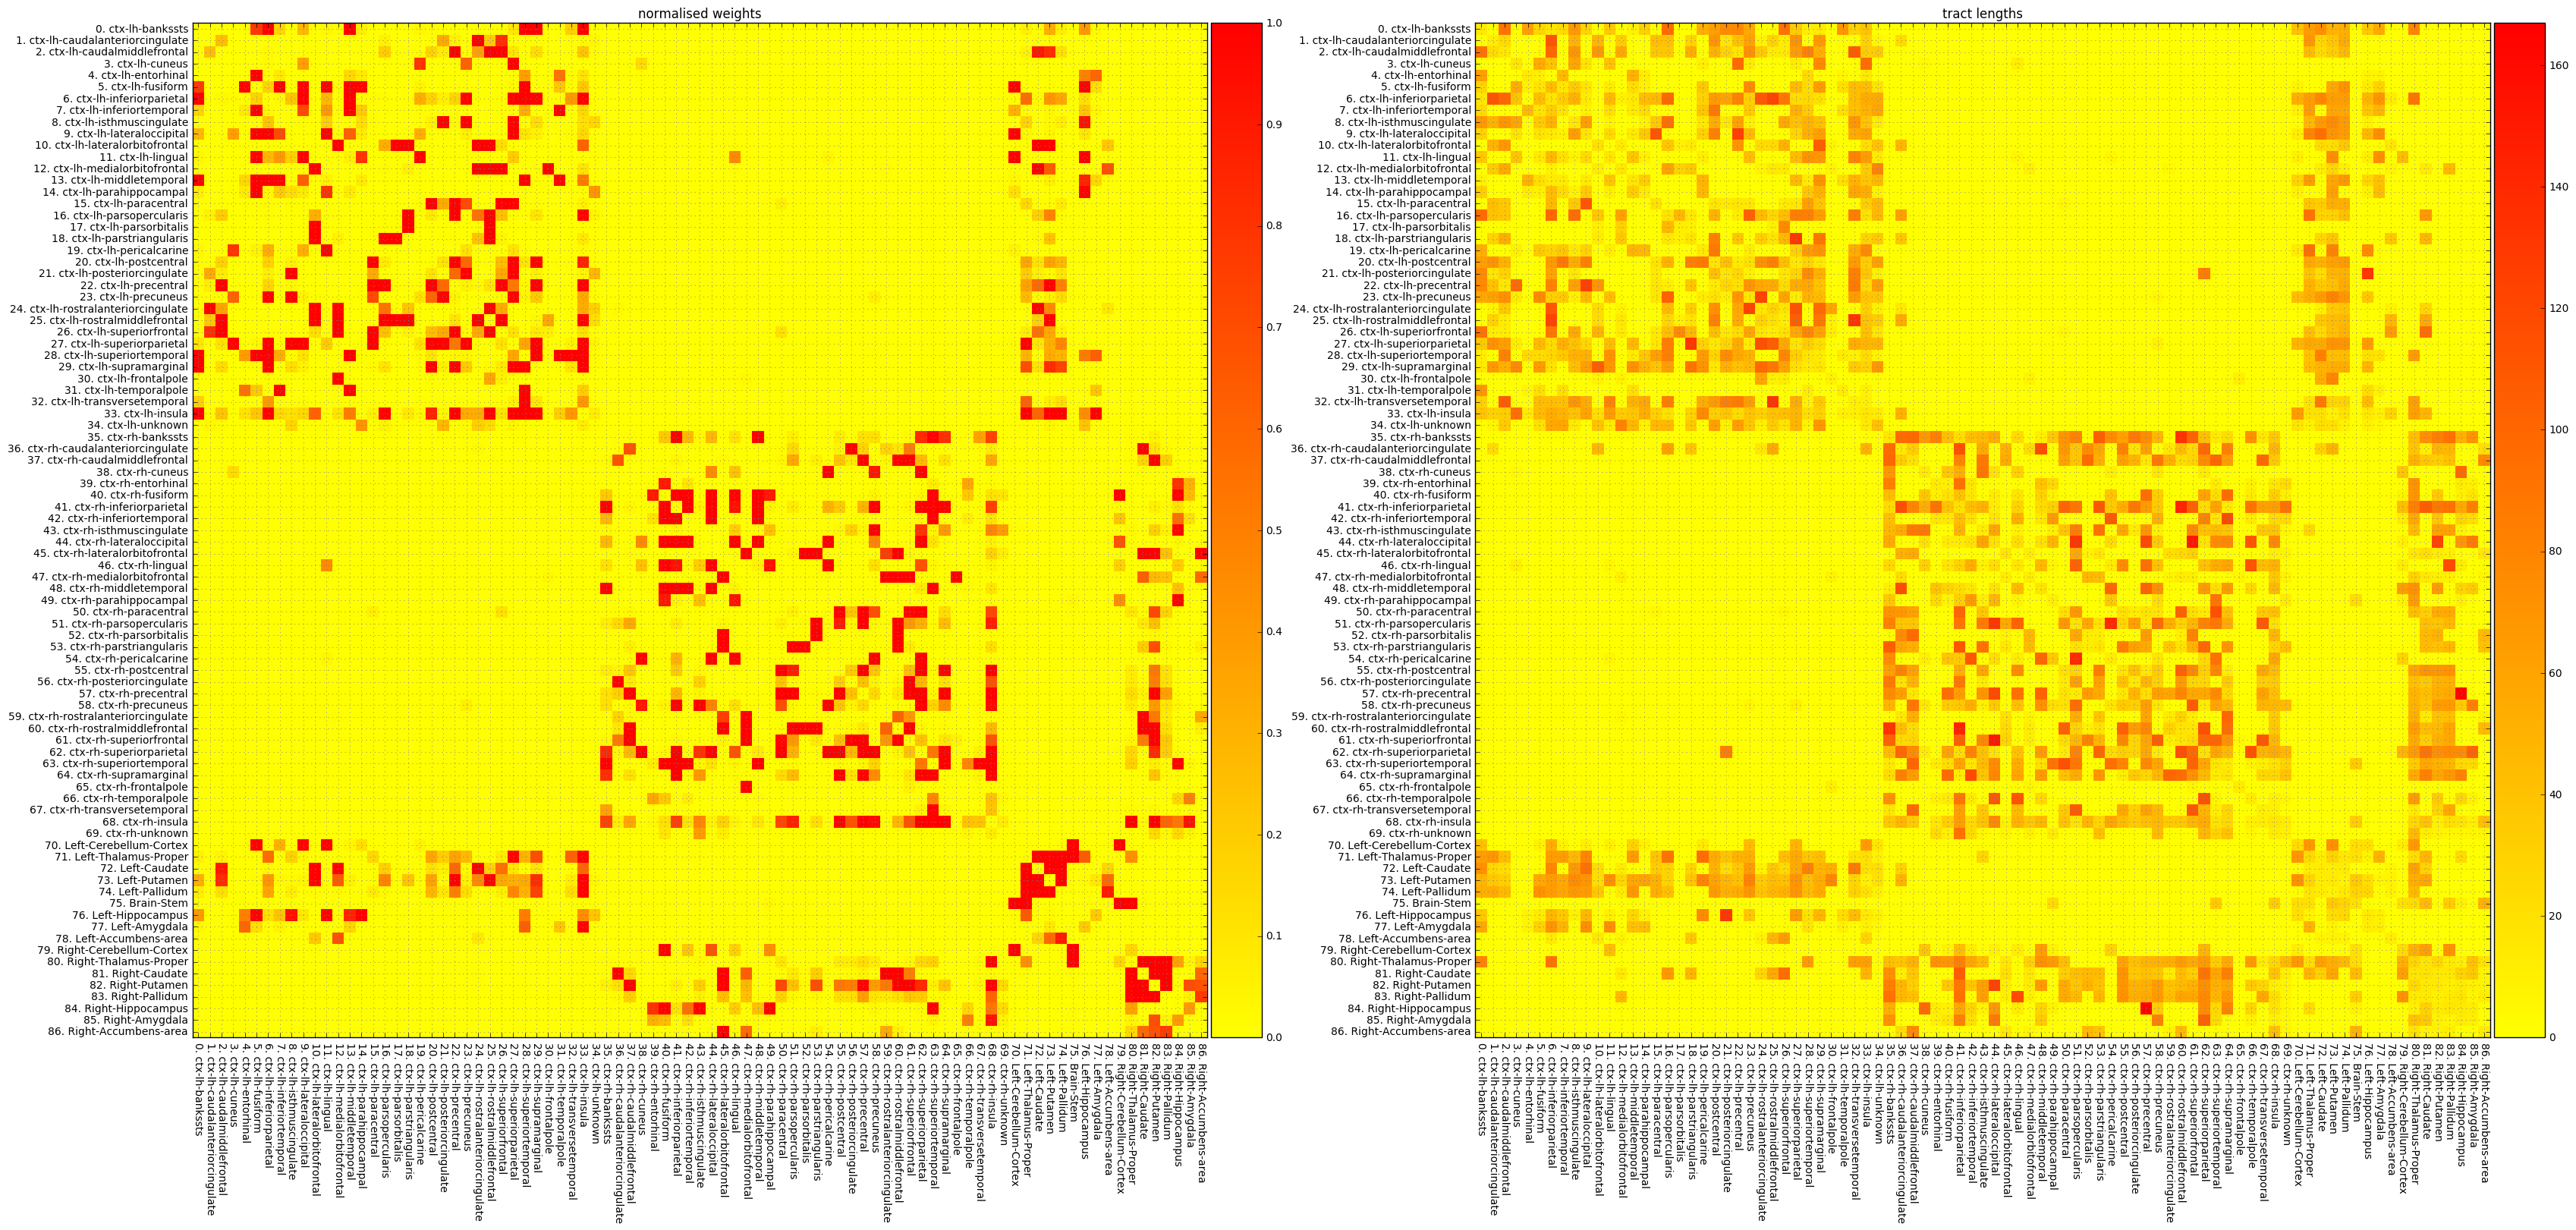

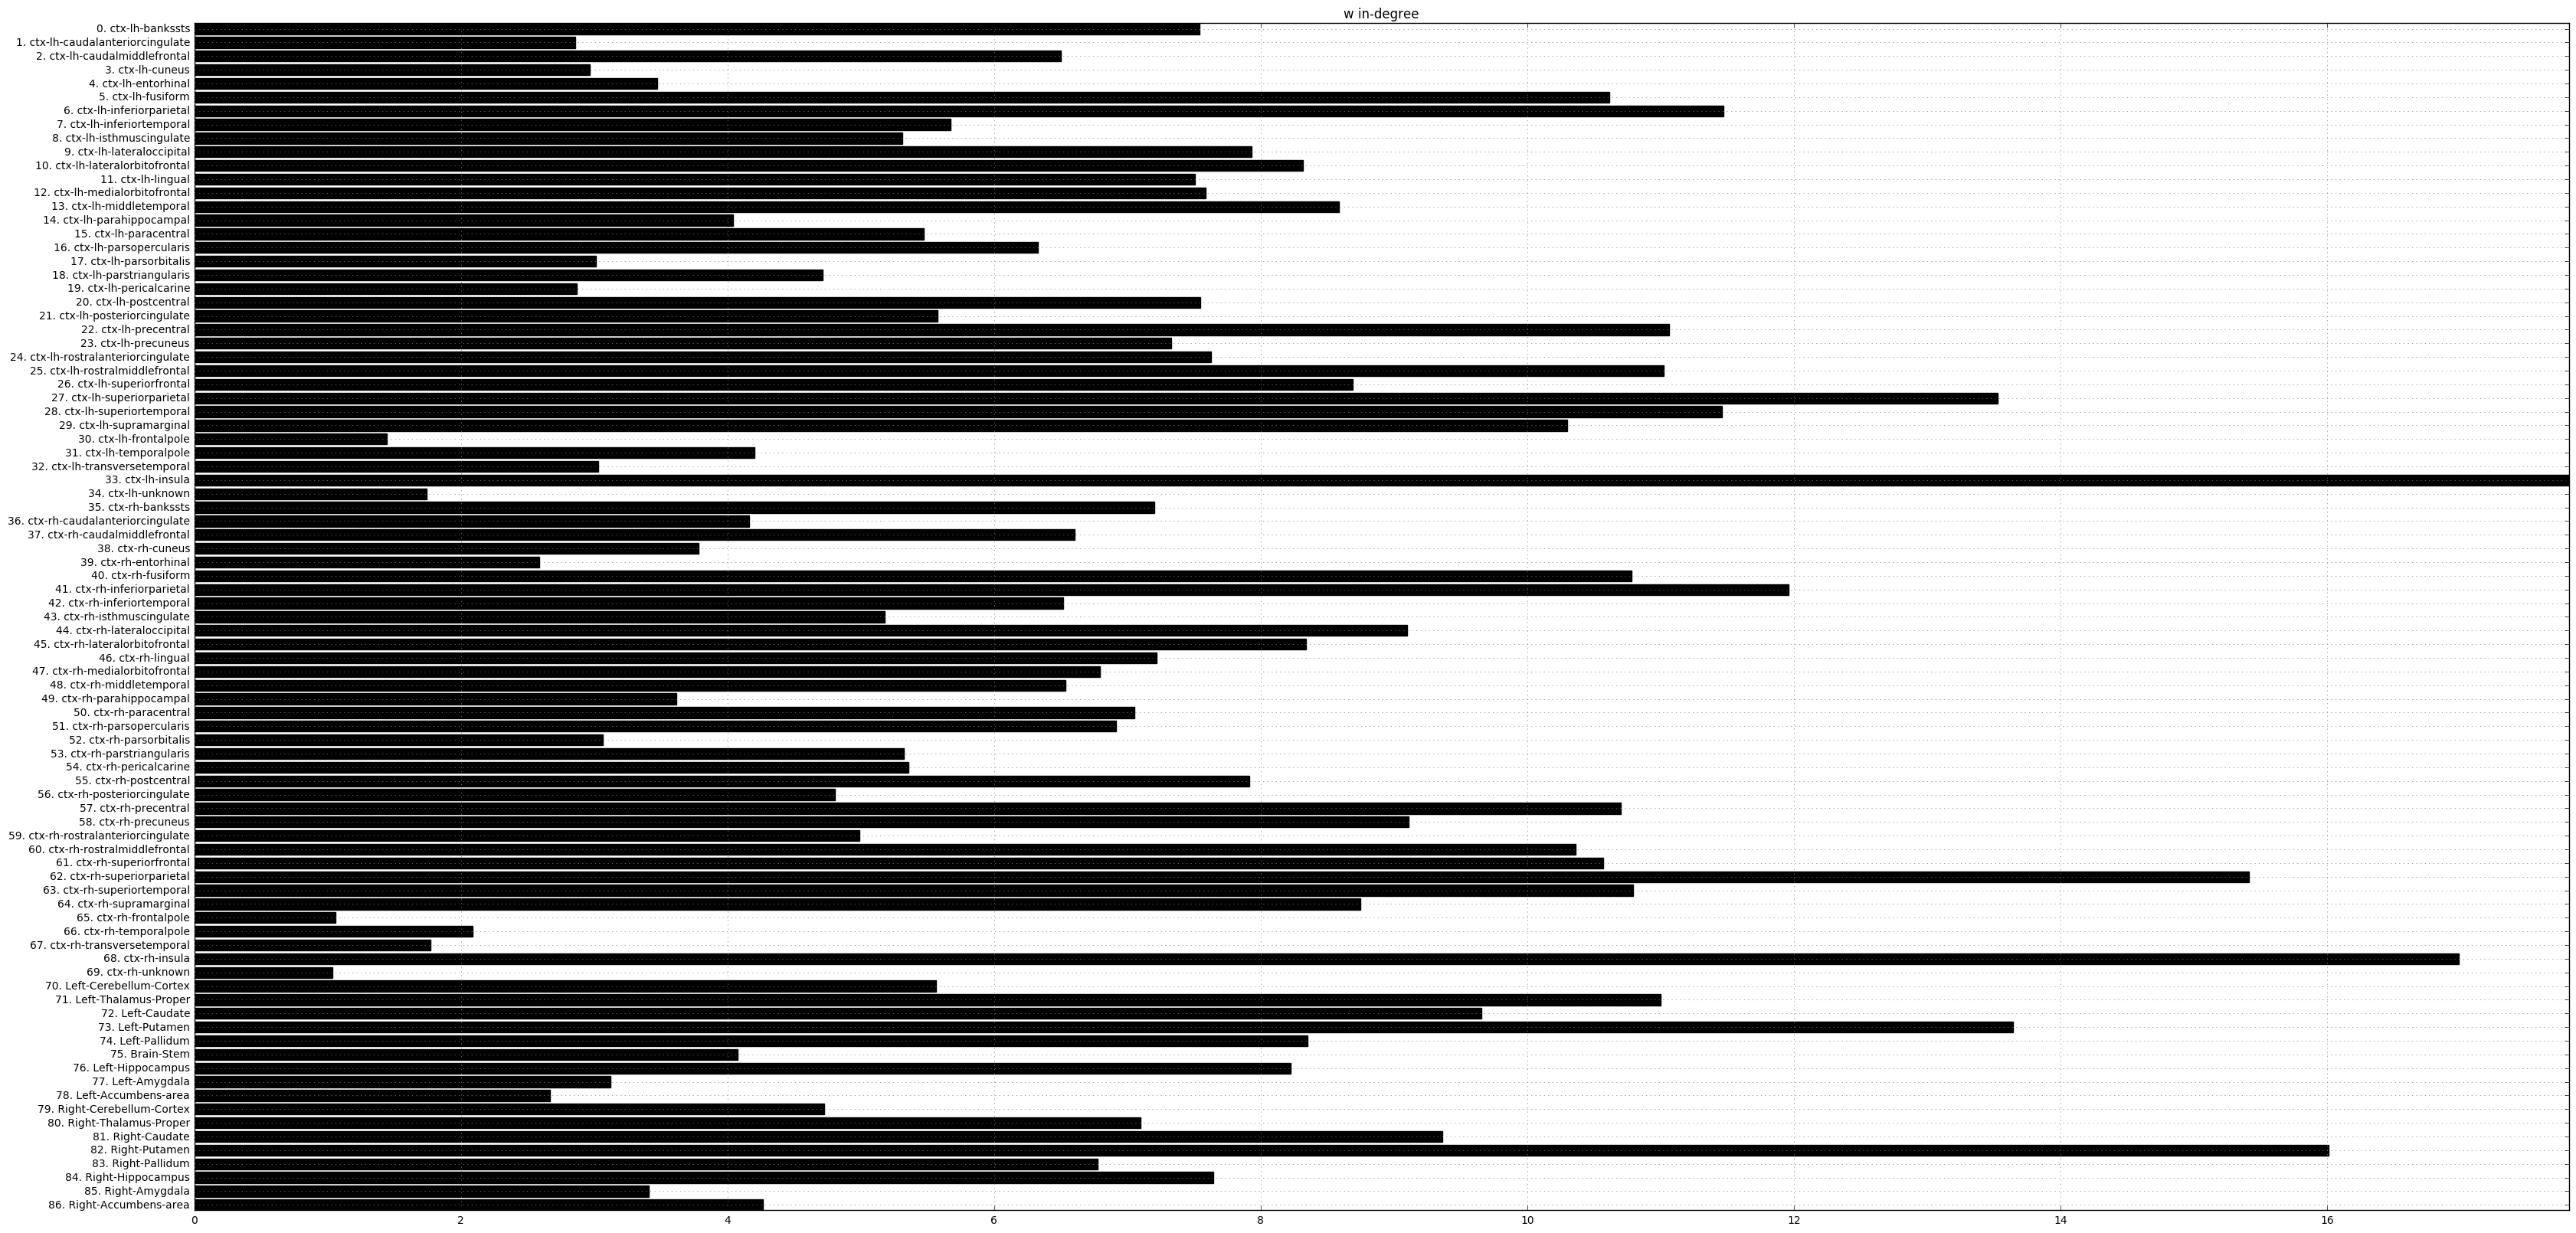

In [7]:
# hide_me
# Plot
# print str(head)
head.plot(show_flag=SHOW_FLAG, save_flag=SAVE_FLAG, figure_dir=FOLDER_FIGURES, figure_format=FIG_FORMAT)

### Define manualy an epileptogenicity hypothesis for this Head:

In [22]:
# hide_me
#...and defining a VEP hypothesis
disease_indices = [2, 32]
disease_values = [2.2, 0.6]
print zip(disease_indices, disease_values)

### Read an epileptogenicity hypothesis from file

In [23]:
# hide_me
from tvb_epilepsy.base.constants.model_constants import X0_DEF, E_DEF
from tvb_epilepsy.custom.readers_custom import CustomReader as Reader
reader = Reader()
ep_name = "ep_l_frontal_complex"
logger.info("\n\Reading epileptogenicity file: " + ep_name)
disease_values = reader.read_epileptogenicity(PATIENT_VIRTUAL_HEAD, name=ep_name)
disease_indices, = np.where(disease_values > np.min([X0_DEF, E_DEF]))
print str(zip(disease_indices, disease_values))

### Generate a disease hypothesis (interpretation as a combination of epileptogenicity, excitability, connectivity)

In [24]:
# hide_me
# Create a new hypothesis for this Head:
# x0s + K*w -> E(x1eq) 

# Regions of Pathological Excitability hypothesis 
# (value range: x0_values = [0.0, 1.0] corresponding to x0 = [-2.460, -2.062], 
# default value for all healthy regions = 0.0)
# by calculating: x0 = 0.398 * x0_values - 2.460
# In the absence of any connectivity, x0cr = -2.062 is the critical value (and therefore x0_values_cr = 1.0)
# When some connectivity is present, x0cr > -2.062 (and therefore x0_values_cr < 1.0)
# This relationship between x0 and the scaled x0_values changes if any of the parameters yc, Iext1, a, b, d of the
# epileptor change, to conserve x0values_cr <= 1.0
x0_indices = [2, 32]
x0_values = [0.95, 0.8]

# Regions of Model Epileptogenicity hypothesis:
# (value range: E = [0.0, 1.0] corresponding to x1 equilibrium point 
# x1eq = [-5/3, -4/3], where x1eq* = -4/3 is the bifurcation point):
# x1eq = (-5 + E)/3
e_indices = []
e_values = []

# Global/afferent coupling hypothesis:
# (value range: K = [0.0, ??); it will be scaled in the background by the number of regions)
K_indices = [] # Set region indices for afferent coupling, else it propagates to all regions (i.e., global coupling)
K_values = []

# Regions of Connectivity hypothesis:
# connectivity will be scaled multiplicatively 
# (i.e, w_disease[w_indices]  = w_original[w_indices] * w_values)
# linear indice: np.ravel_multi_index([0, 1], head.connectivity.normalized_weights.shape)
w_indices = [] # linear indice
w_values = [] 

from tvb_epilepsy.base.model.disease_hypothesis import DiseaseHypothesis
hyp = DiseaseHypothesis(head.connectivity.number_of_regions, 
                        excitability_hypothesis={tuple(x0_indices): x0_values}, 
                        epileptogenicity_hypothesis={},
                        connectivity_hypothesis={})

all_regions_indices = np.array(range(head.number_of_regions))
healthy_indices = np.delete(all_regions_indices, disease_indices).tolist()
n_healthy = len(healthy_indices)
logger.info("\n\Disease hypothesis created: " + hyp.name)

### Configure the model

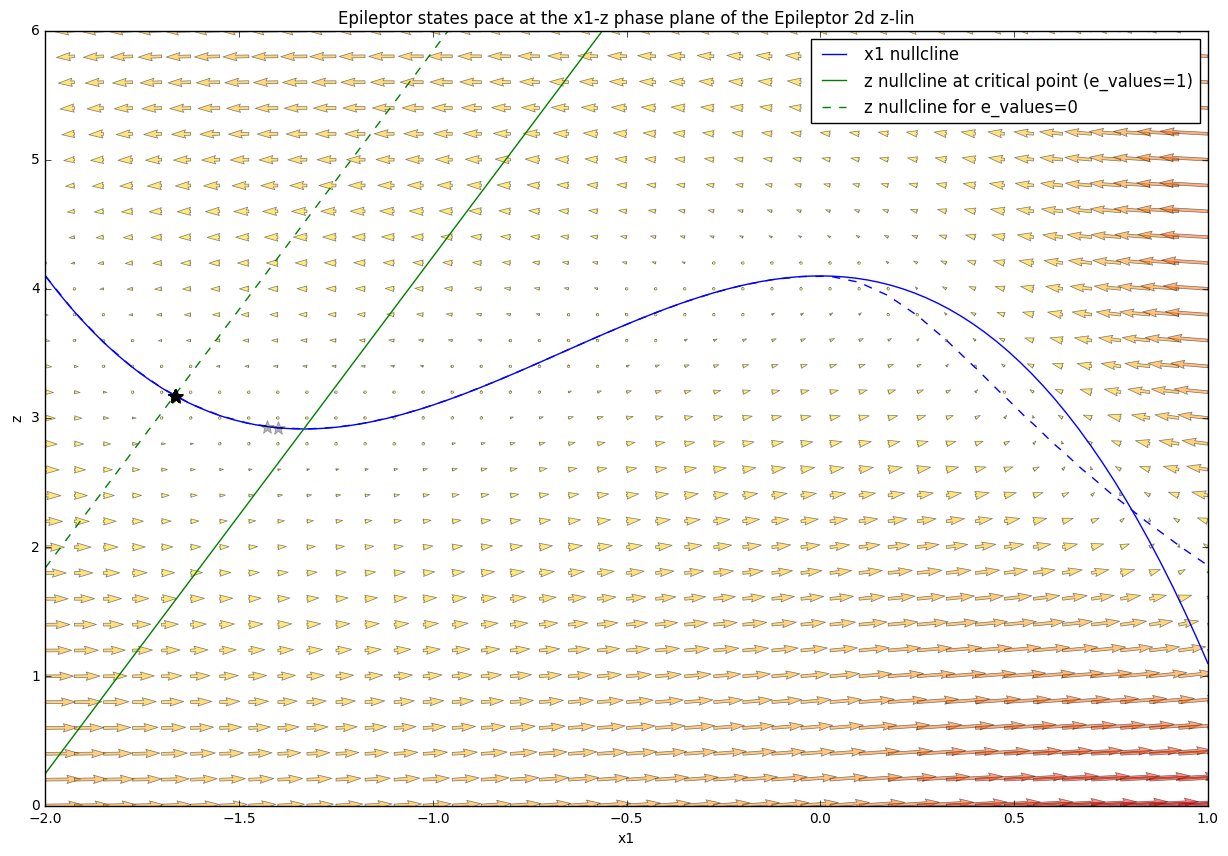

In [12]:
# hide_me
from tvb_epilepsy.service.model_configuration_service import ModelConfigurationService

logger.info("\n\Computing model configuration...")
# Special considerations of a K hypothesis:
if len(K_values) == 0:
    model_configuration_service = ModelConfigurationService(hyp.number_of_regions)
else:
    from tvb_epilepsy.base.constants import K_DEF
    if len(K_indices) == 0:
        model_configuration_service = ModelConfigurationService(hyp.number_of_regions, K=K_values[0])
    else:
        K = K_DEF * numpy.ones((hyp.number_of_regions,), dtype=numpy.float32)
        K[K_indices] = K_values
        model_configuration_service = ModelConfigurationService(hyp.number_of_regions, K=K)
        
# Write the service to a file        
model_configuration_service.write_to_h5(FOLDER_RES, hyp.name + "_model_config_service.h5")

# Generate the model configuration, i.e., compute the equilibrium point etc
model_configuration = model_configuration_service.configure_model_from_hypothesis(hyp, 
                                                                                  head.connectivity.normalized_weights)
model_configuration.write_to_h5(FOLDER_RES, hyp.name + "_ModelConfig.h5")

# Plot state space of model configuration
model_configuration_service.plot_state_space(model_configuration, 
                                             head.connectivity.region_labels, 
                                             special_idx=disease_indices, model="2d", zmode="lin",
                                             figure_name=hyp.name + "_StateSpace",
                                             show_flag=SHOW_FLAG, save_flag=SAVE_FLAG, 
                                             figure_dir=FOLDER_FIGURES, figure_format=FIG_FORMAT)

### Run Linear Stability Analysis (LSA)

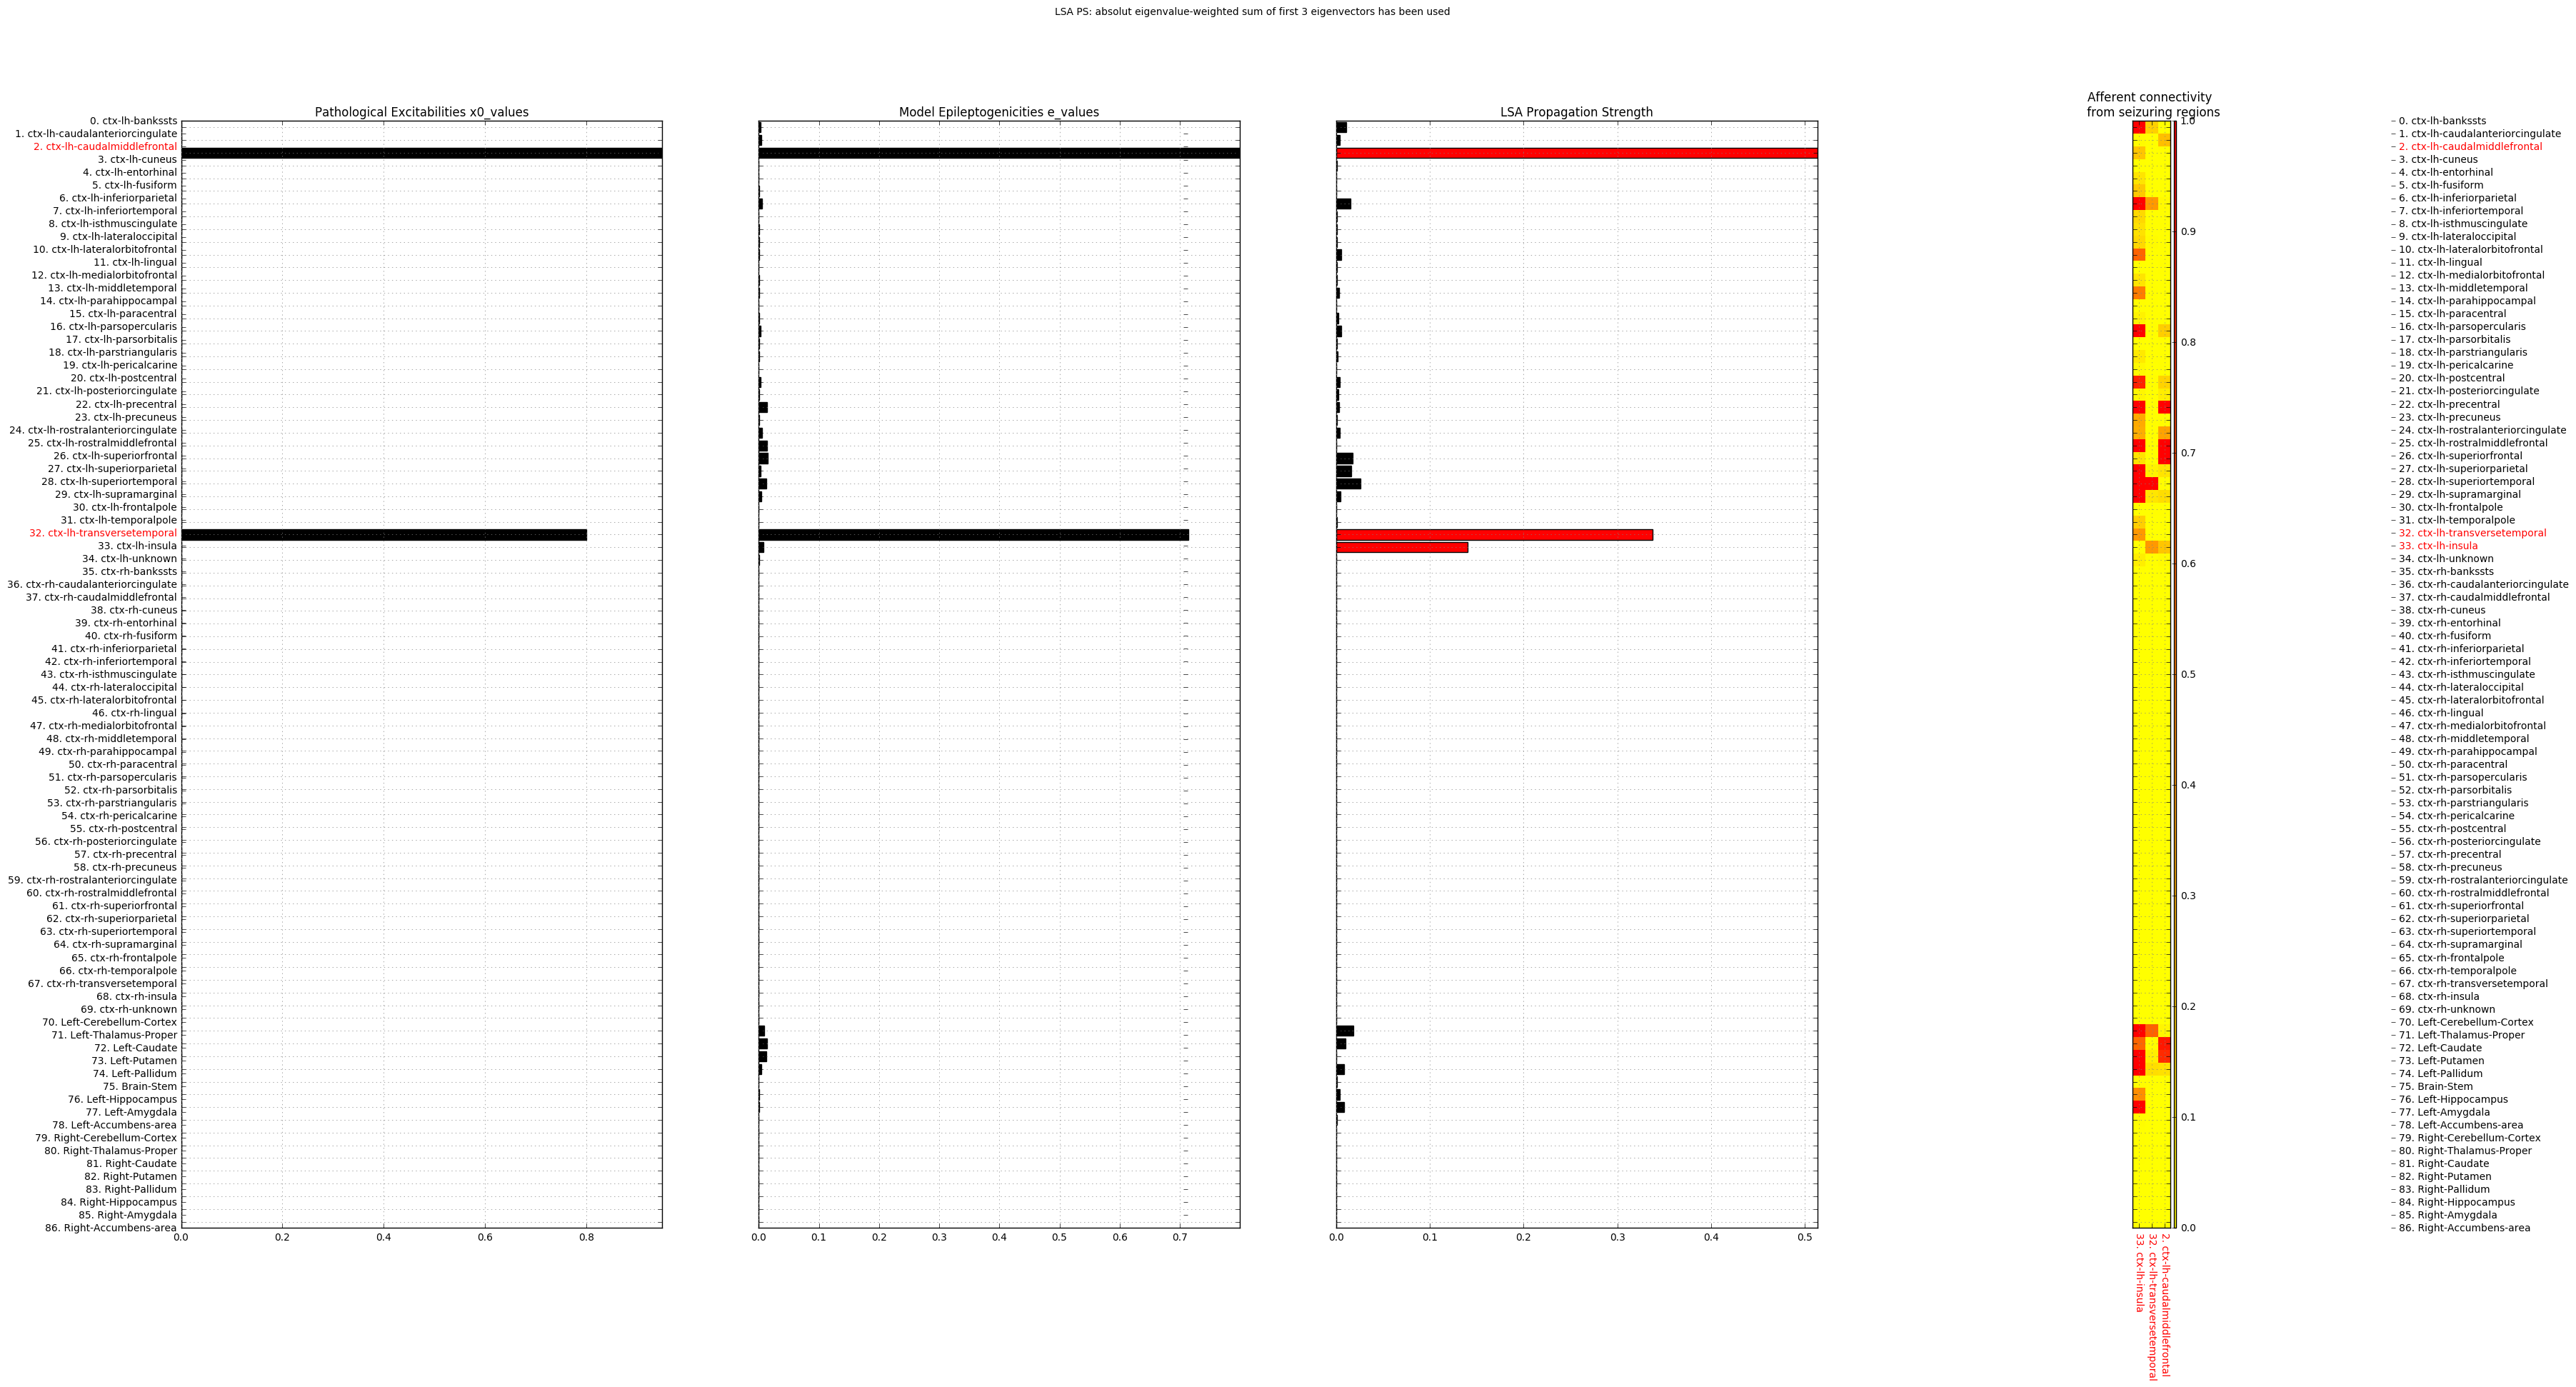

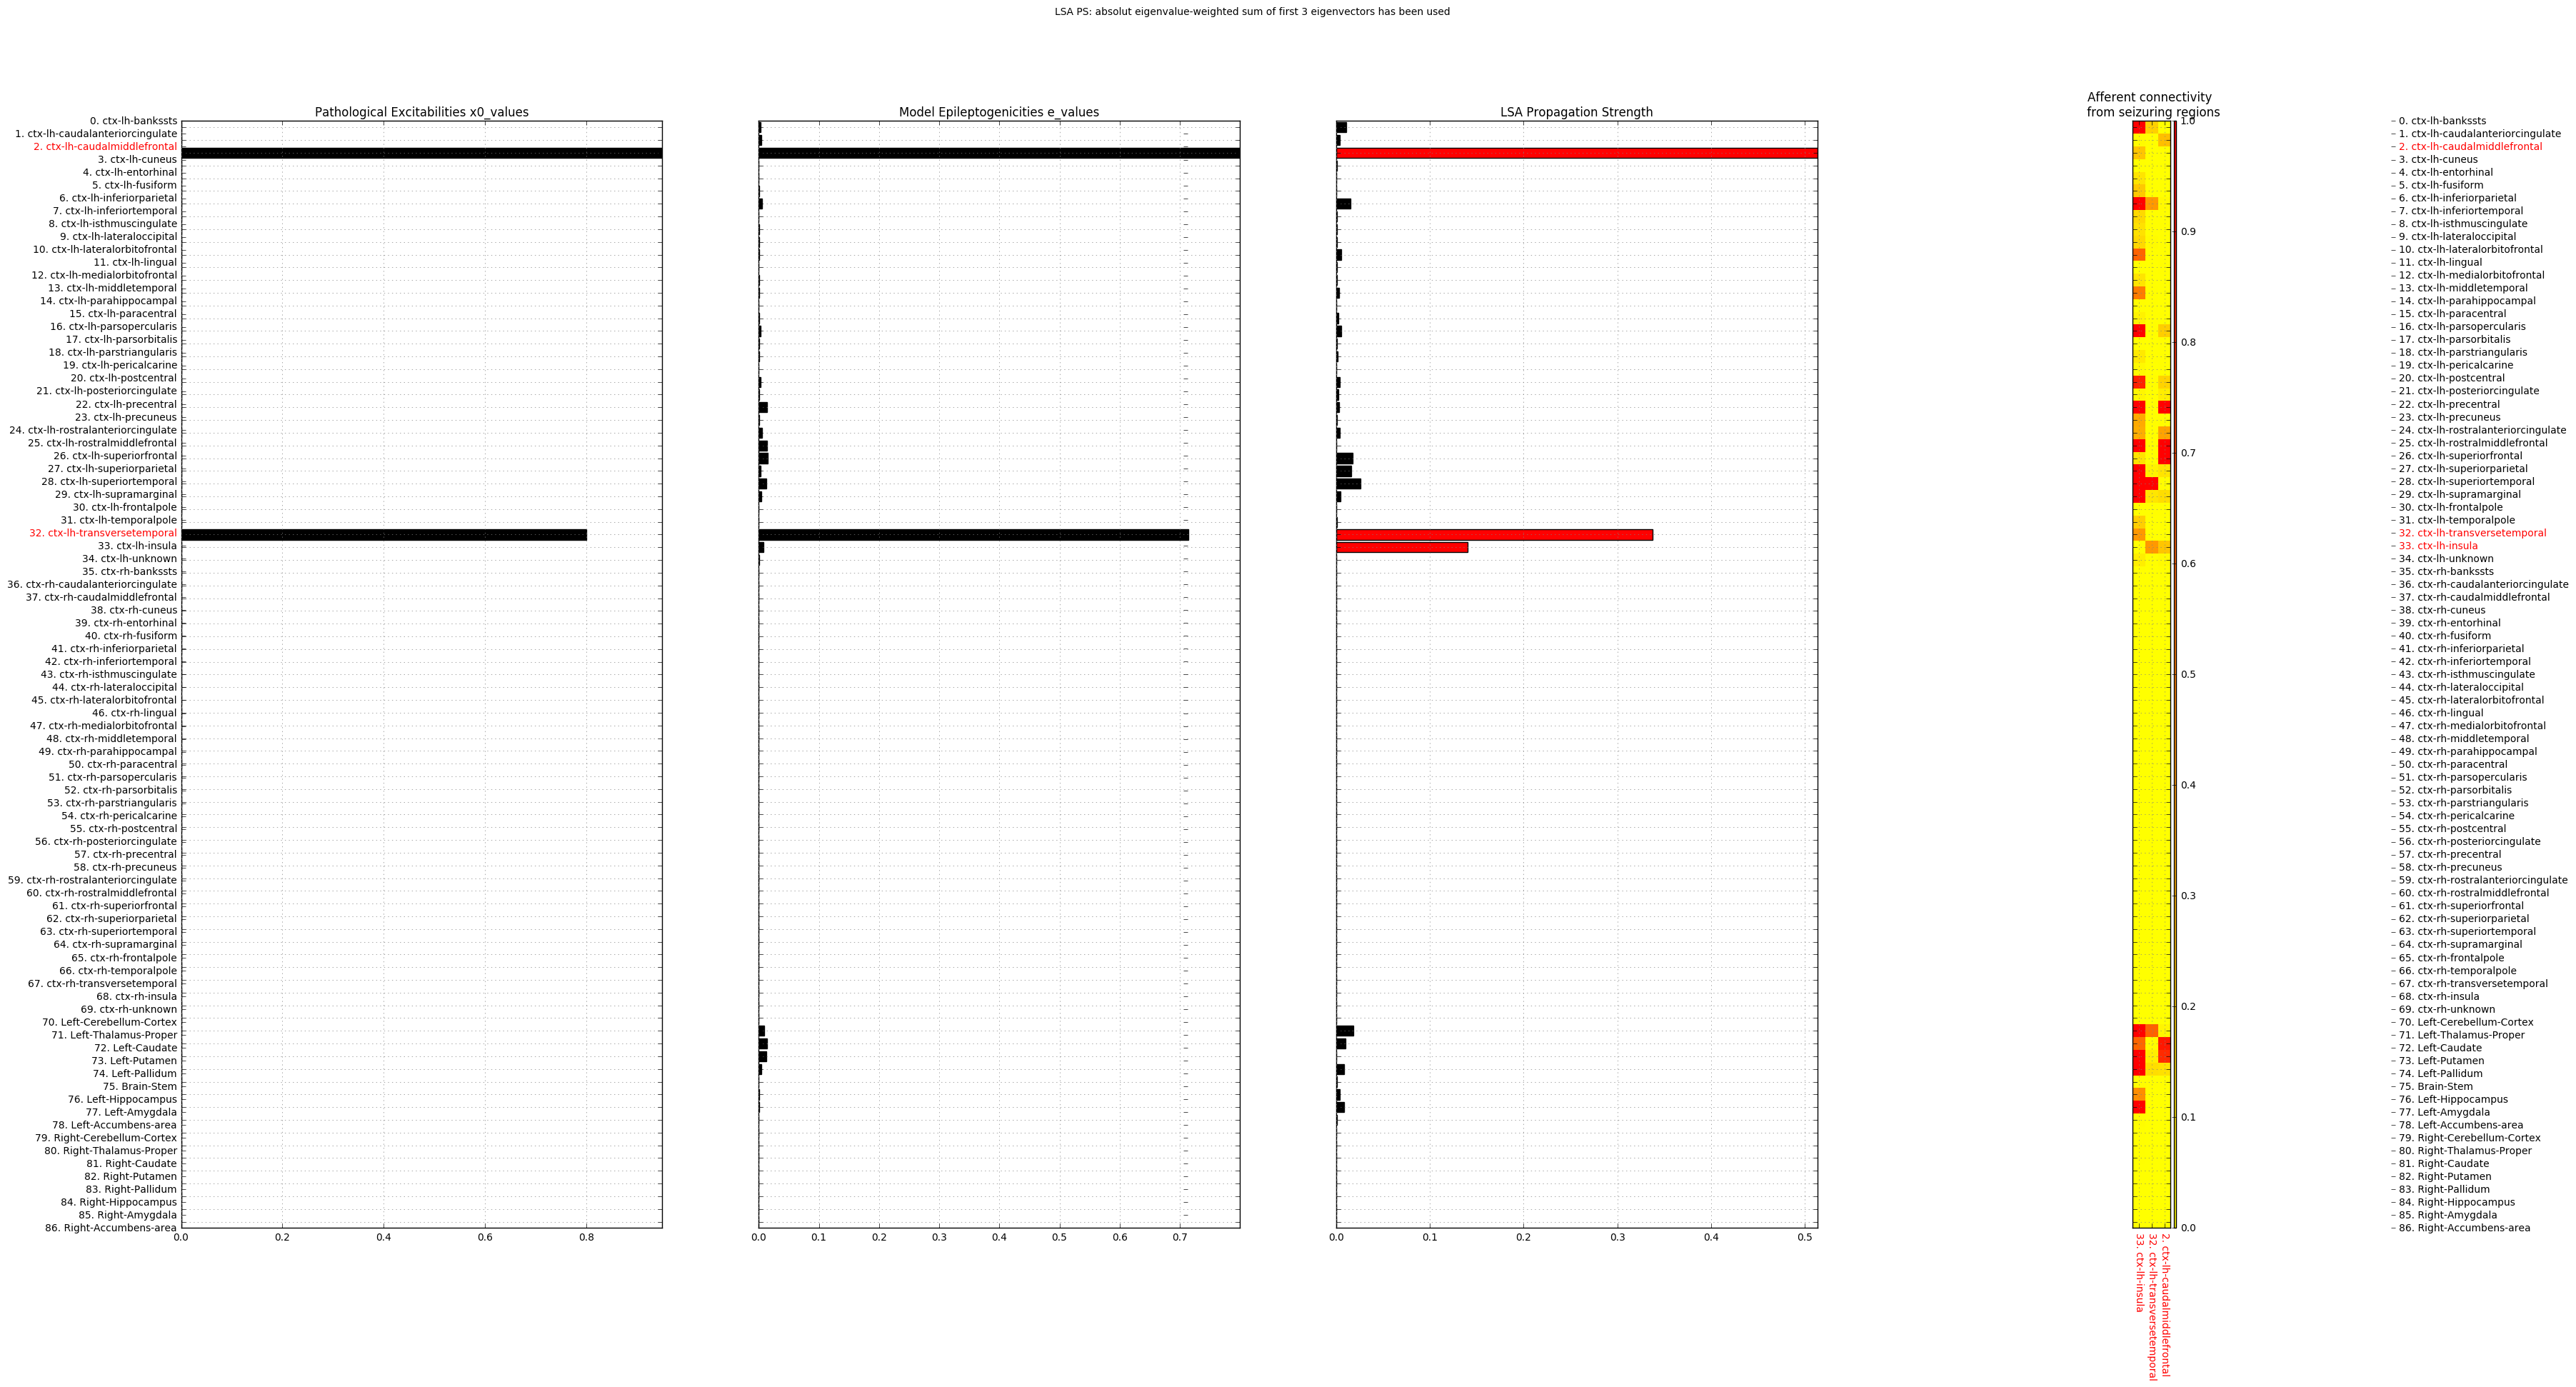

In [13]:
# hide_me
from tvb_epilepsy.service.lsa_service import LSAService
logger.info("\n\nRunning LSA...")
lsa_service = LSAService(eigen_vectors_number=None, weighted_eigenvector_sum=True)
lsa_hypothesis = lsa_service.run_lsa(hyp, model_configuration)
lsa_hypothesis.write_to_h5(FOLDER_RES, lsa_hypothesis.name + ".h5")
lsa_service.write_to_h5(FOLDER_RES, "lsa_config_service.h5")
# Plot hypothesis and LSA results
lsa_service.plot_lsa(lsa_hypothesis, model_configuration, 
                     head.connectivity.region_labels,  None,
                     figure_dir=FOLDER_FIGURES)

### Run a Parameter Search Exploration LSA around the clinical hypothesis:

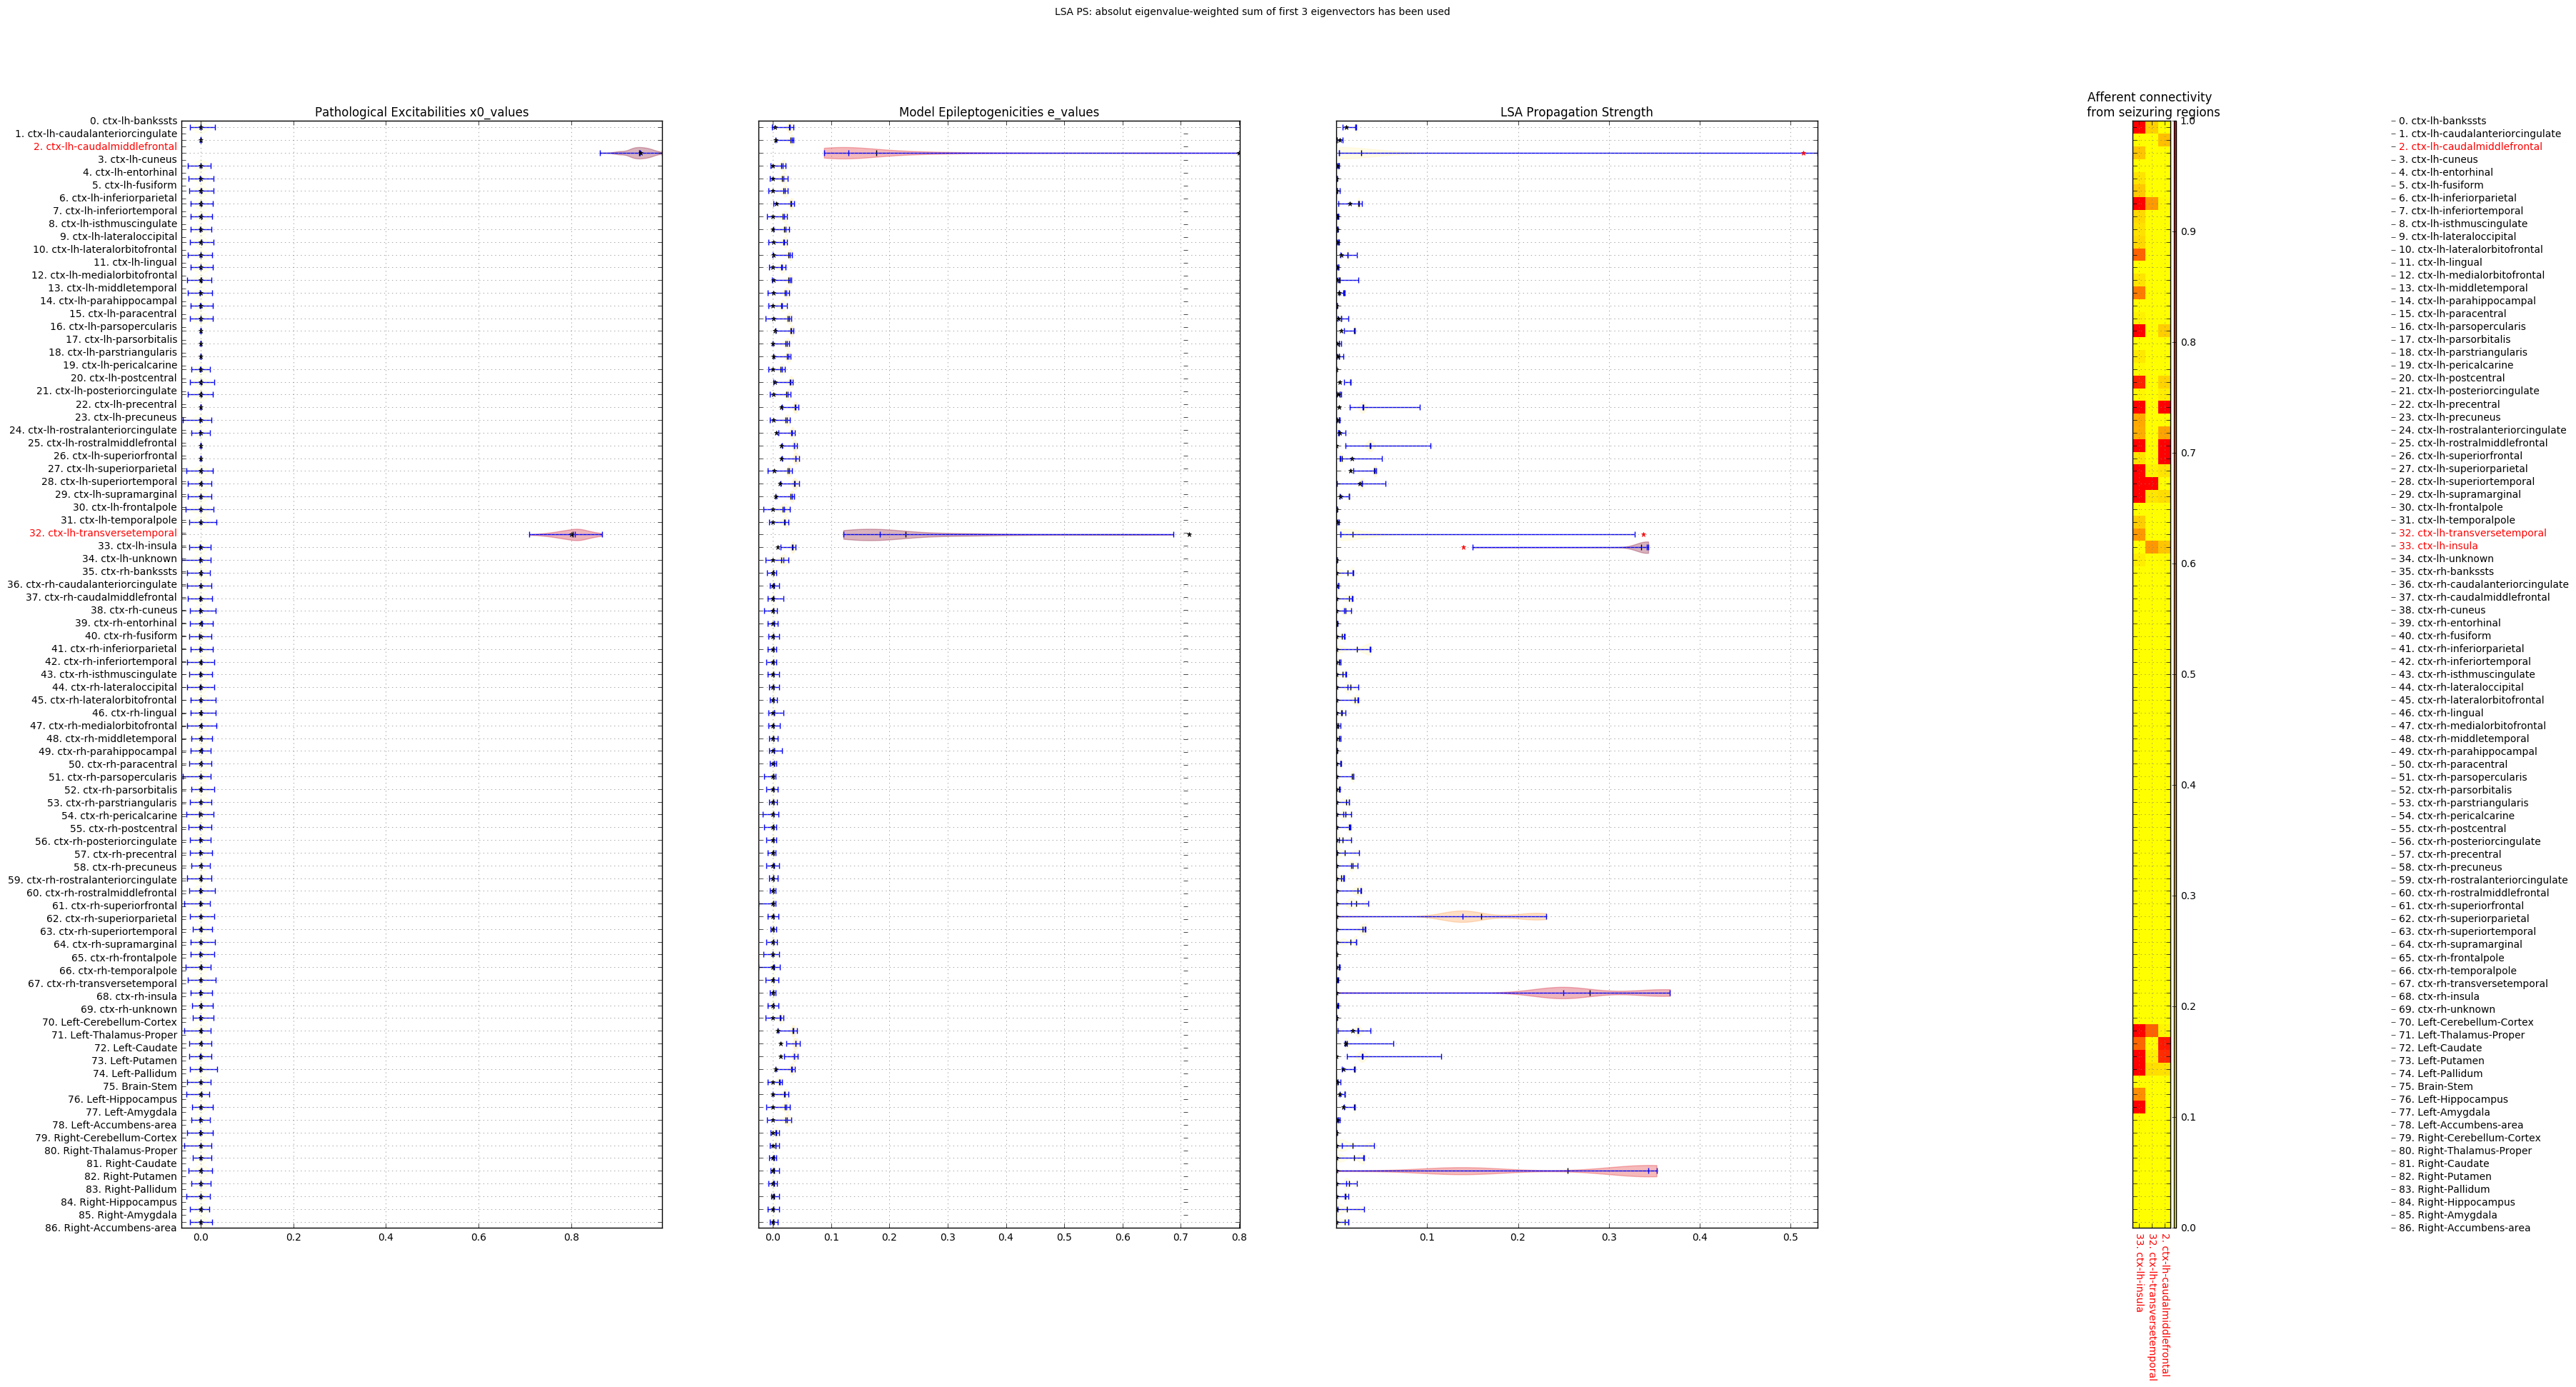

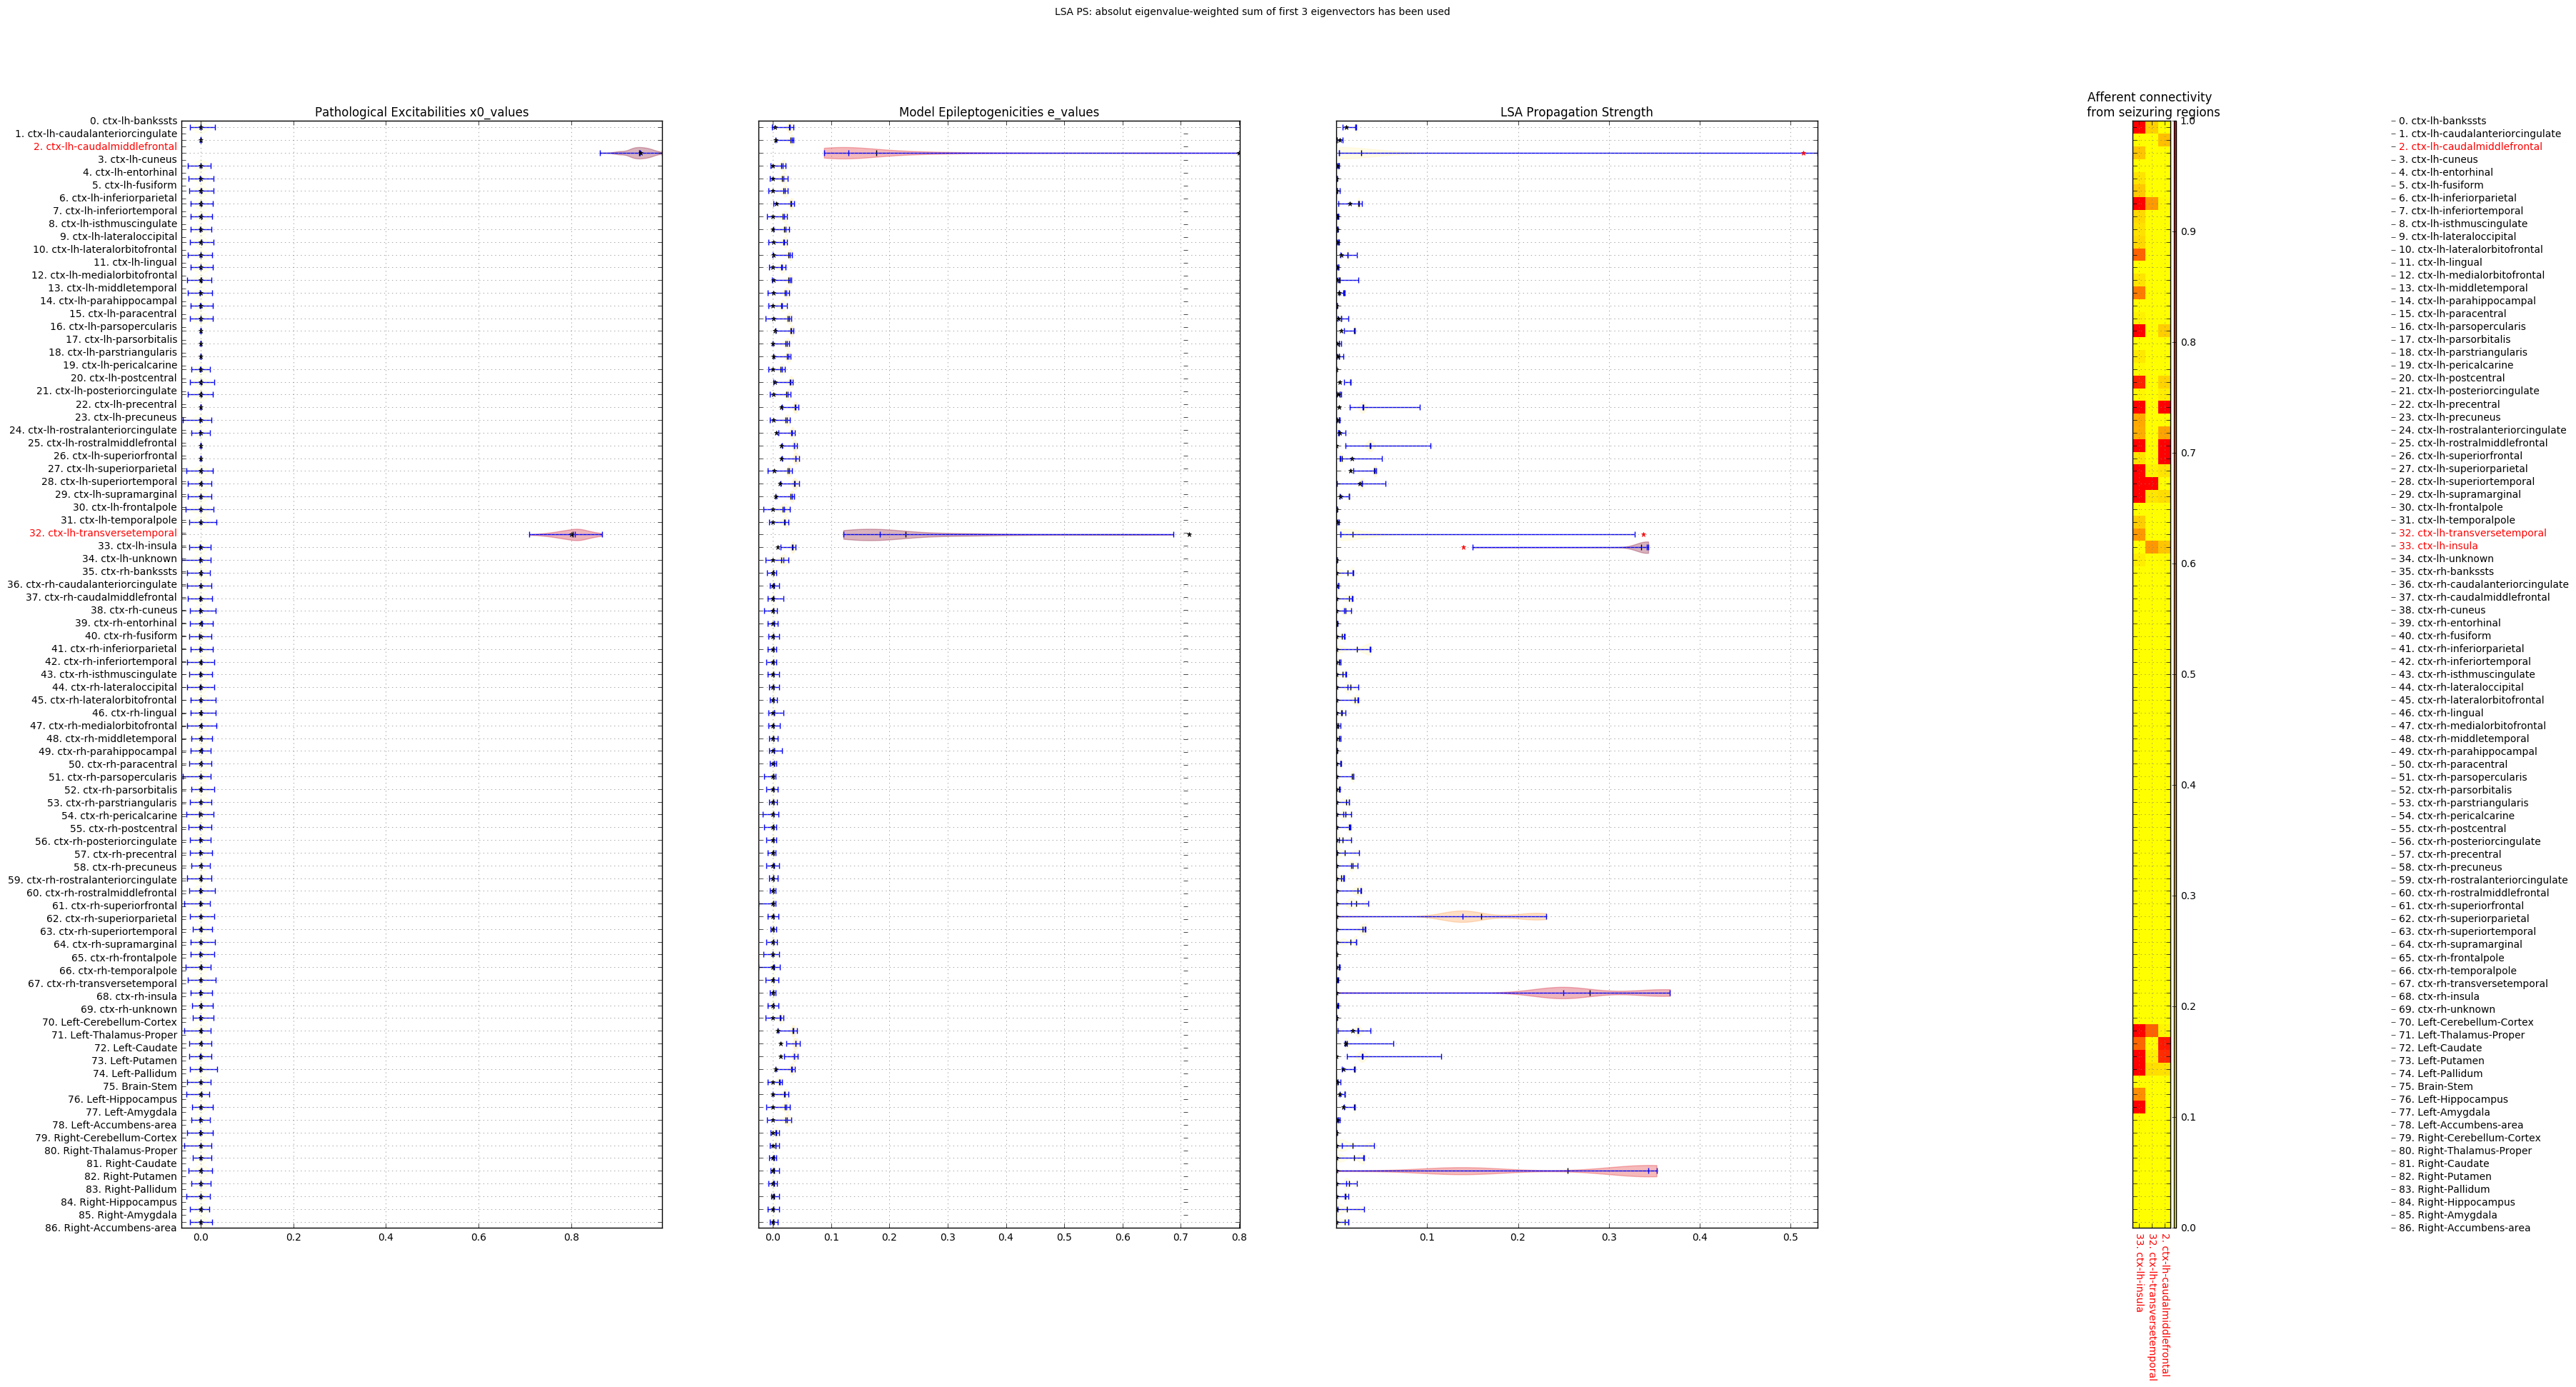

In [14]:
# hide_me
# This can be a complicated script... Too many choices to be made 
# (mainly choosing deterministic and/or stochastic parameters)...
from tvb_epilepsy.scripts.pse_scripts import pse_from_lsa_hypothesis
n_samples = 100
#--------------Parameter Search Exploration (PSE)-------------------------------
logger.info("\n\nRunning PSE LSA...")
pse_results = pse_from_lsa_hypothesis(lsa_hypothesis,
                                      model_configuration.model_connectivity,
                                      head.connectivity.region_labels,
                                      n_samples, param_range=0.1,
                                      global_coupling=[{"indices": all_regions_indices}],
                                      healthy_regions_parameters=[{"name": "x0_values",
                                                                   "indices": healthy_indices}],
                                      model_configuration_service=model_configuration_service,
                                      lsa_service=lsa_service, save_flag=True, folder_res=FOLDER_RES,
                                      filename="PSE_LSA", logger=logger)[0]
# Plot results
lsa_service.plot_lsa(lsa_hypothesis, model_configuration, head.connectivity.region_labels, pse_results,
                     title="Hypothesis PSE LSA Overview", figure_dir=FOLDER_FIGURES)

### Simulate hypothesis and plot results:

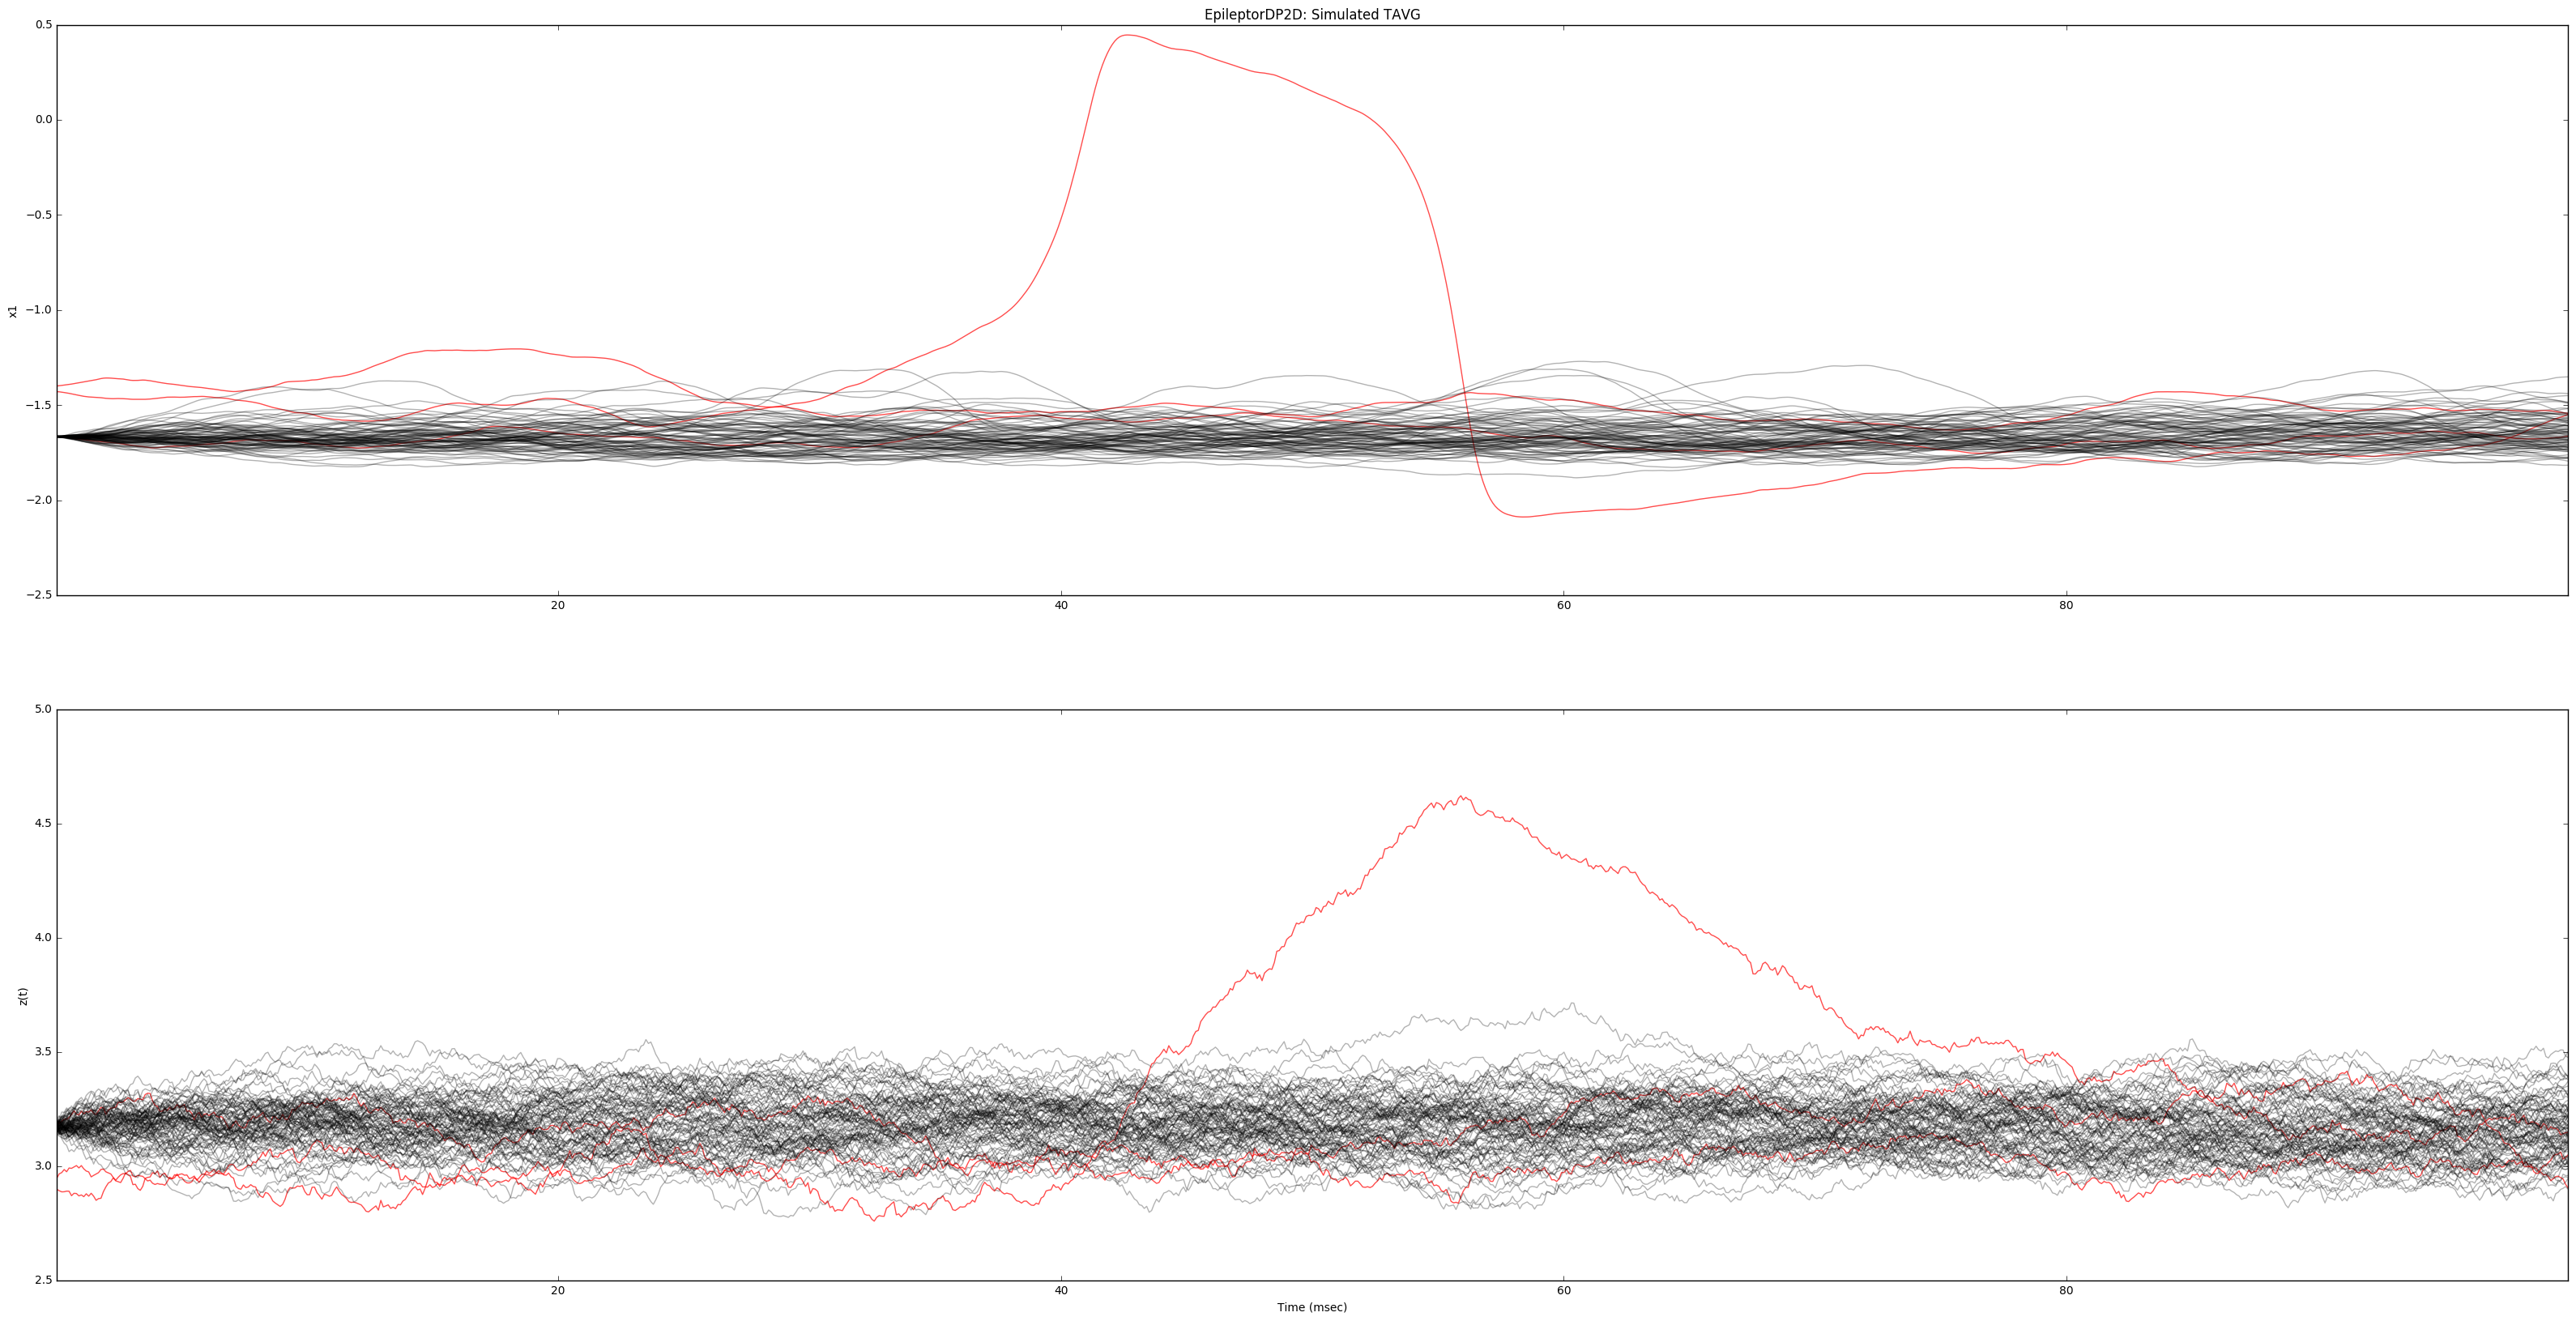

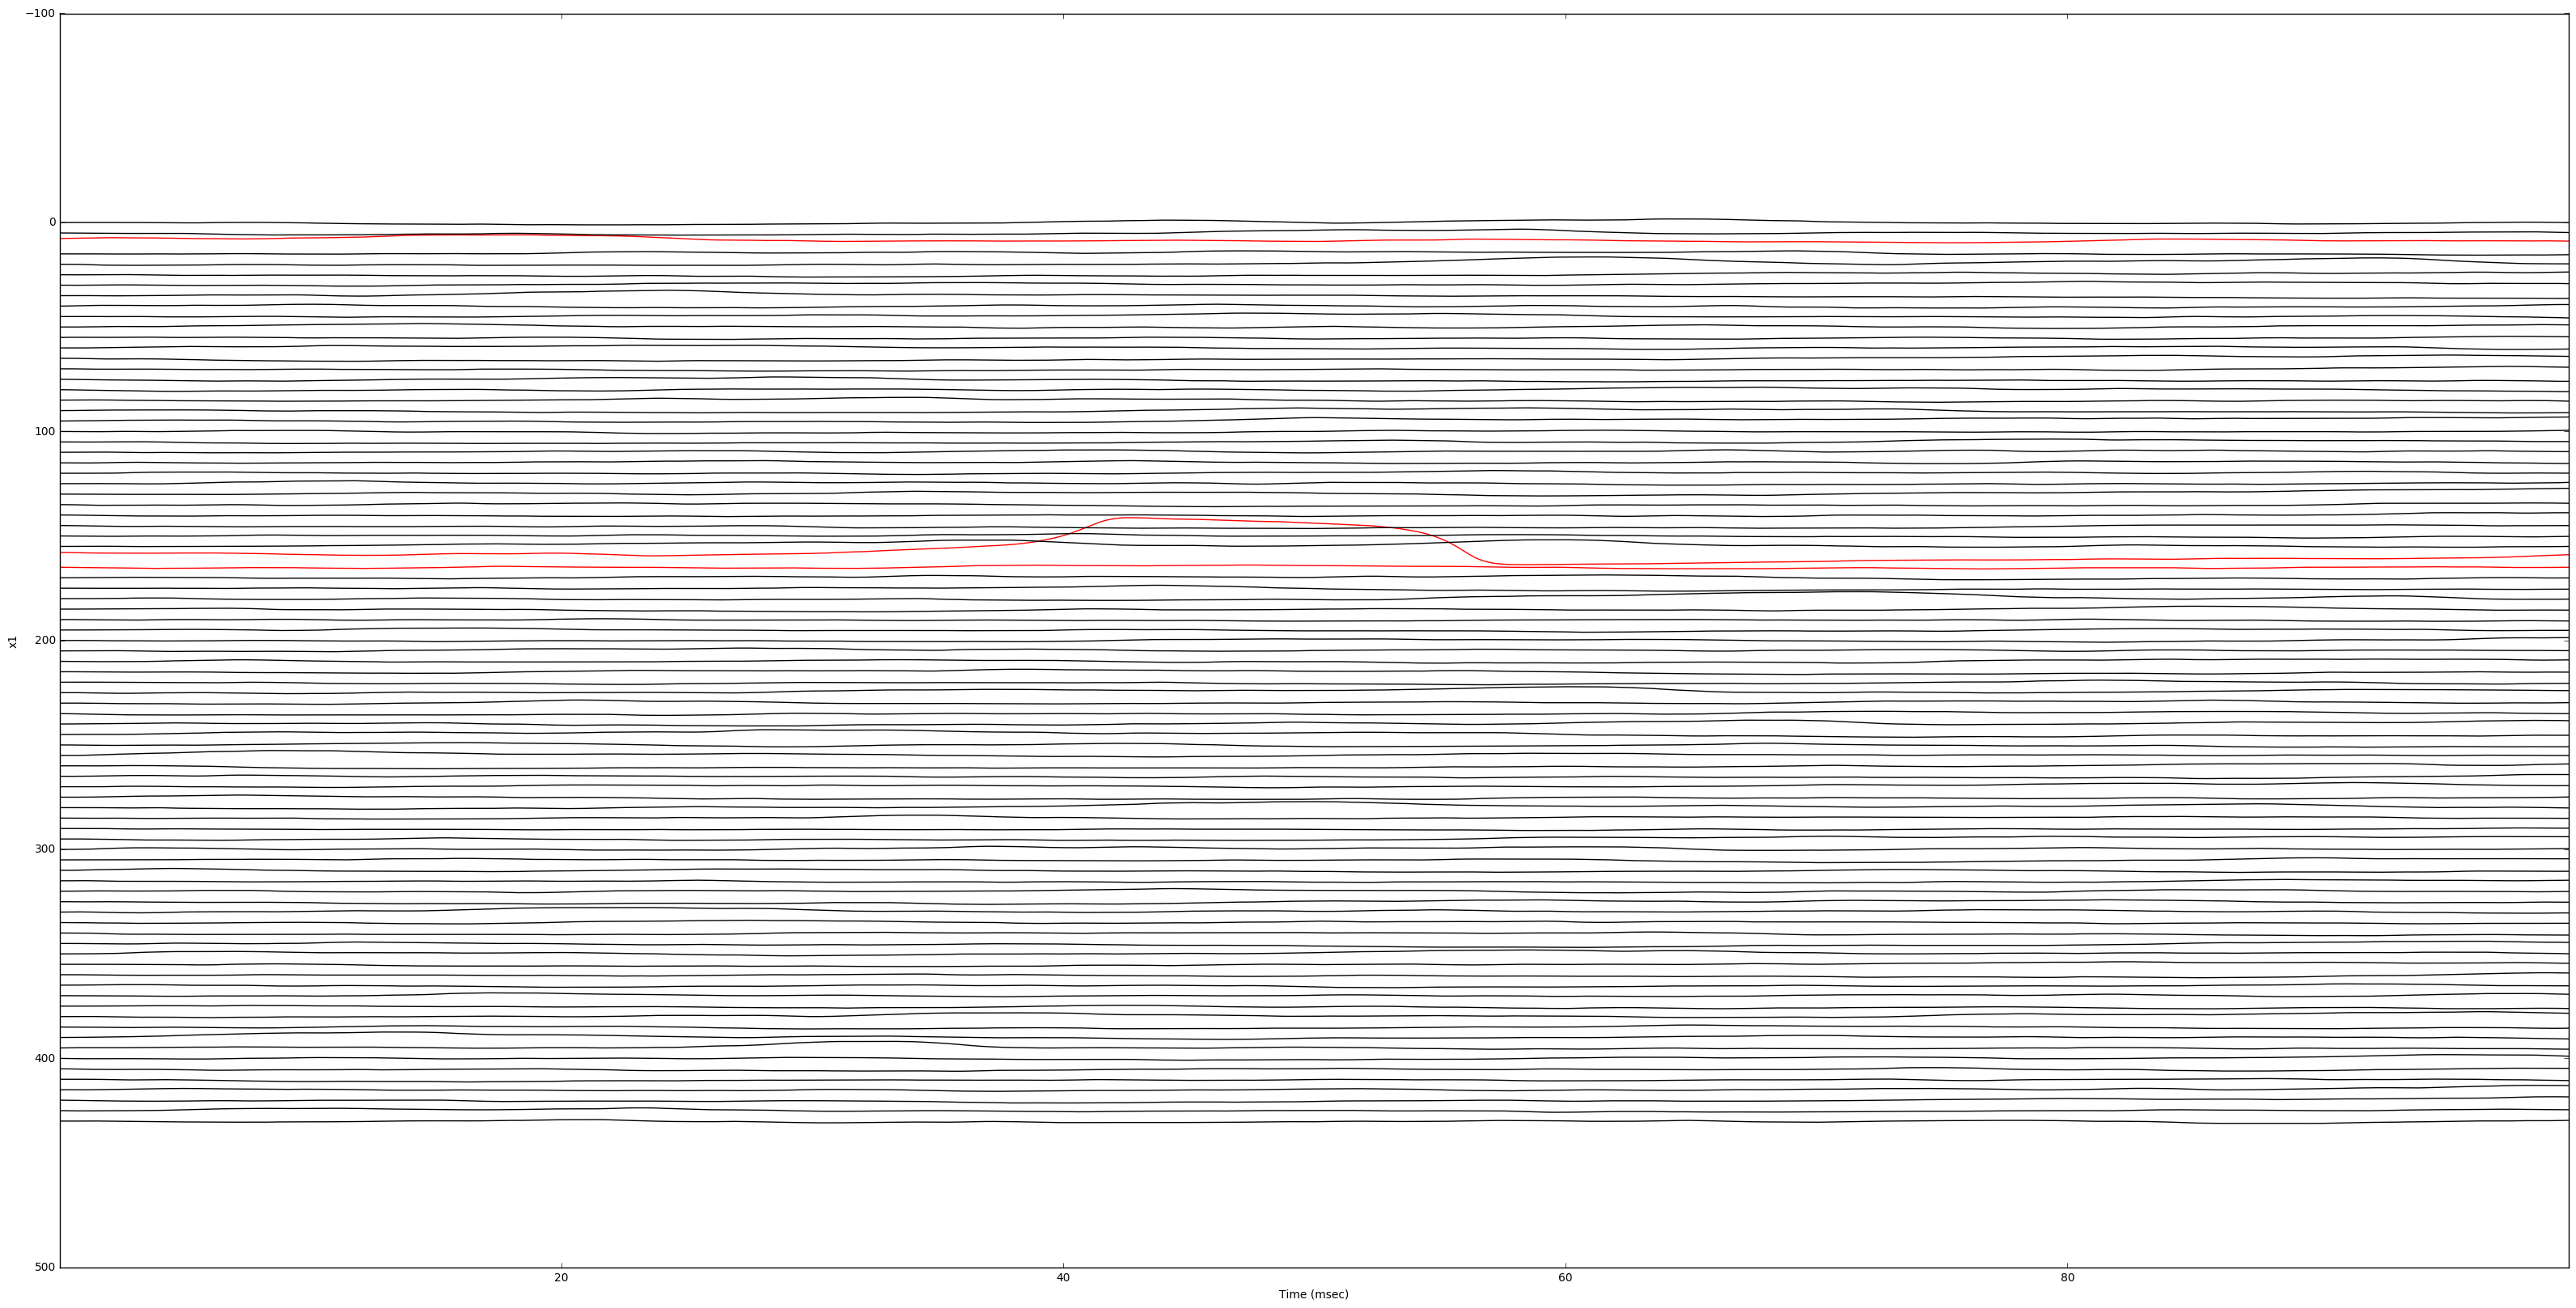

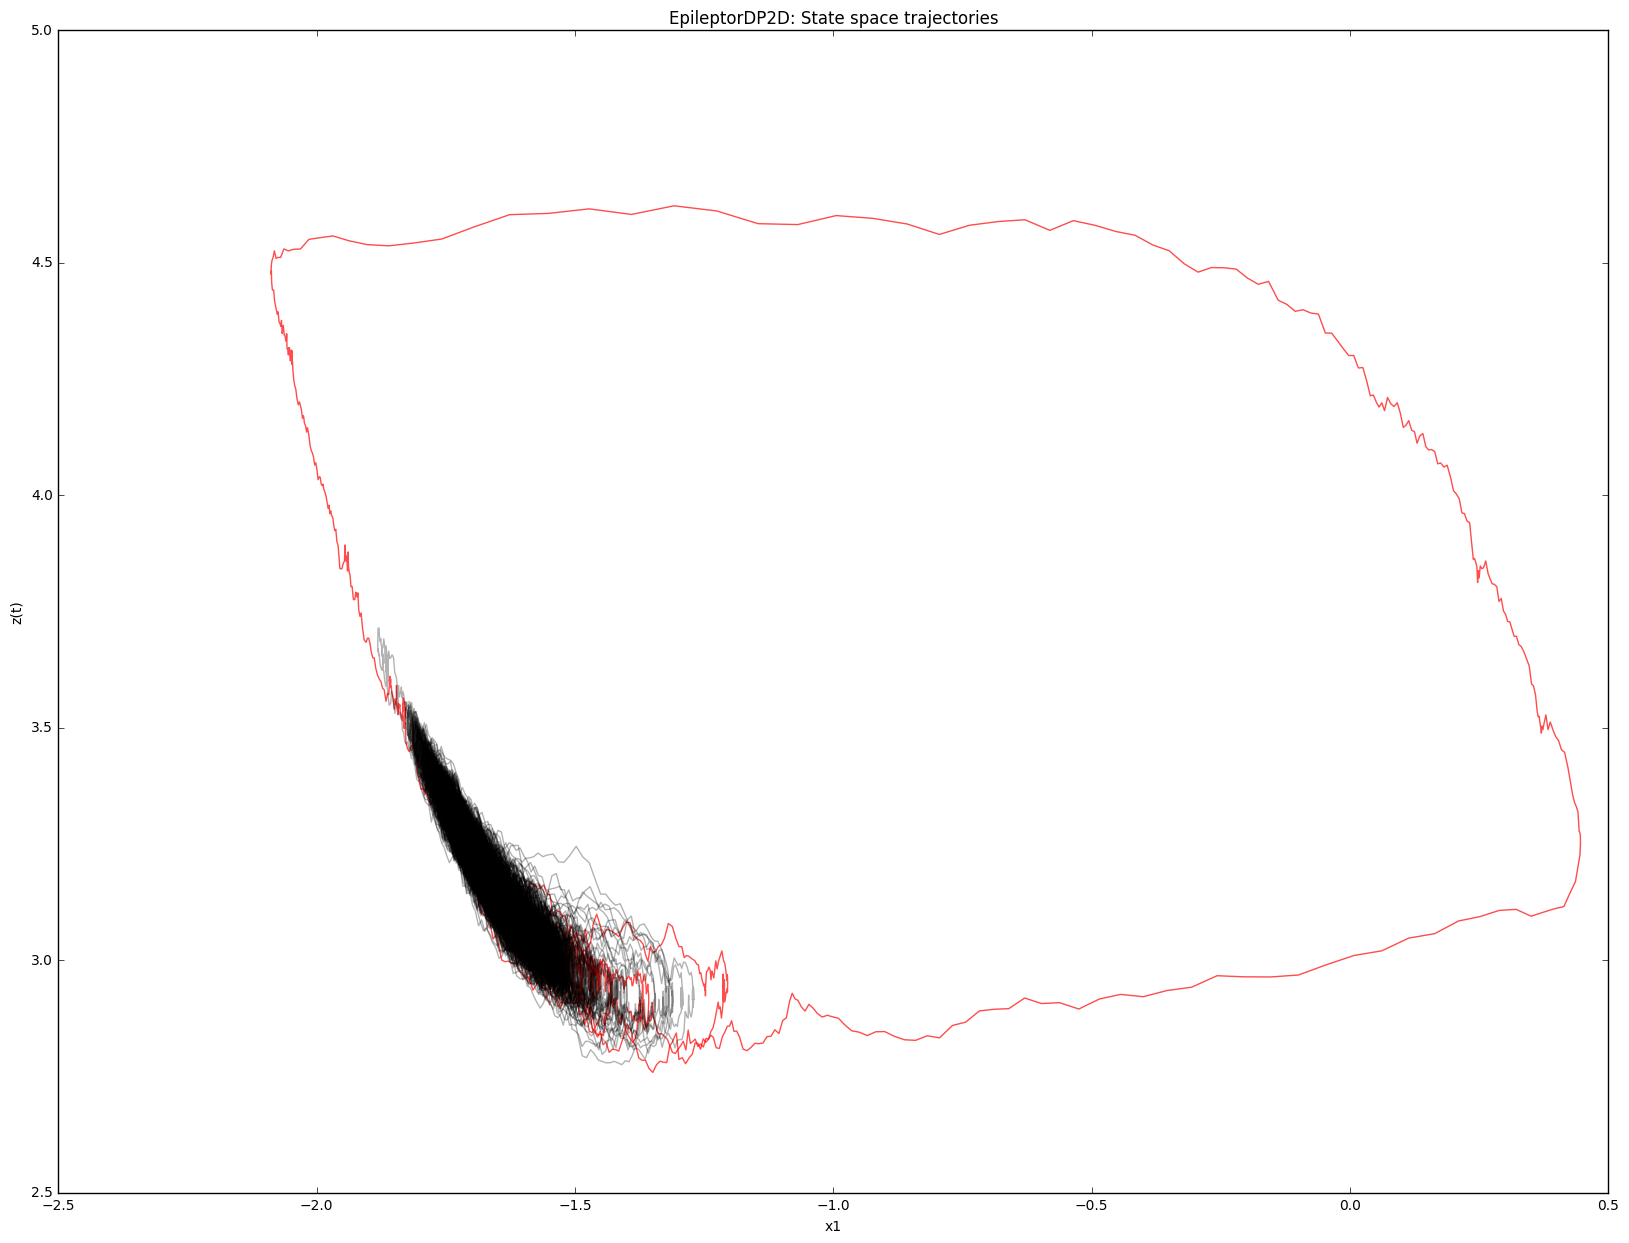

In [15]:
# hide_me
from tvb_epilepsy.scripts.simulation_scripts import from_model_configuration_to_simulation
# Choose which dynamical Epileptor model to simulate:
dynamical_model = "EpileptorDP2D" # "EpileptorDP2D", "EpileptorDPrealistic"
# This can be a complicated script... Too many choices to be made...
vois_ts_dict = from_model_configuration_to_simulation(model_configuration, head, lsa_hypothesis, 
                                                      sim_type="fitting", dynamical_model=dynamical_model,
                                                      ts_file=None, plot_flag=True,save_flag=True, 
                                                      results_dir=FOLDER_RES, figure_dir=FOLDER_FIGURES, 
                                                      logger=logger, tau1=0.5, tau0=30.0, noise_intensity=10 ** -3)

## Inverting the simulations
### Generate a model inversion service and a statistical model corresponding to a particular stan model file

In [17]:
# hide_me
from tvb_epilepsy.service.model_inversion.sde_model_inversion_service import SDEModelInversionService
model_inversion = SDEModelInversionService(model_configuration, lsa_hypothesis, head, dynamical_model, logger=logger)
statistical_model = model_inversion.generate_statistical_model() # observation_expression="lfp"
statistical_model = model_inversion.update_active_regions(statistical_model, methods=["e_values", "LSA"],
                                                                  active_regions_th=0.1, reset=True)

ValueError: Lower limit of sig base distribution outside support!: 
(self.low-self.loc)/self.scale) = -1.12132034356
cdf(self.low-self.loc)/self.scale) = 0.0

### Select/Set (manually or automatically) the target observation signals


In [ ]:
# hide_me
signals, time, statistical_model, vois_ts_dict = \
            model_inversion.set_target_data_and_time(target_data_type, vois_ts_dict, statistical_model,
                                                     select_signals=True, manual_selection=manual_selection,
                                                     n_electrodes=8, auto_selection="correlation-power",
                                                     sensors_per_electrode=2, group_electrodes=True,
                                                     decimate=4, cut_signals_tails= (6, 6)))
model_inversion.write_to_h5(FOLDER_RES, lsa_hypothesis.name + "_ModelInversionService.h5")
statistical_model.write_to_h5(FOLDER_RES, lsa_hypothesis.name + "_StatsModel.h5")

### Generate stan model data

In [ ]:
# hide_me
model_data = model_inversion.generate_model_data(statistical_model, signals)
convert_to_h5_model(model_data).write_to_h5(FOLDER_RES, "ModelData.h5")

### Run fitting with stan

In [ ]:
stan_service = CmdStanService(model_name=stats_model_name, model=None, model_code=None,
                                      model_dir="model_dir", model_code_path="model_code_path",
                                      fitmethod="sampling", random_seed=12345, init="random", logger=logger)
# stan_service = PyStanService(model_name=stats_model_name, model=None, model_code=None,
#                                     model_dir="model_dir", model_code_path="model_code_path",
#                                     fitmethod="sample", random_seed=12345, init="random", logger=logger)
stan_service.set_or_compile_model()
est, fit = stan_service.fit(model_data=model_data, debug=1, simulate=0,
                            merge_outputs=False, chains=1, refresh=1, **kwargs)
convert_to_h5_model(est).write_to_h5(FOLDER_RES, lsa_hypothesis.name + "_fit_est.h5")
est = ensure_list(est)

### Update model configuration with fitting results and plot 

In [ ]:
for id_est, this_est in enumerate(est):
    model_inversion.plot_fit_results(this_est, statistical_model, signals, time=None,
                                     seizure_indices=lsa_hypothesis.get_regions_disease(),
                                     trajectories_plot=True, id_est=str(id_est))
# -------------------------- Reconfigure model after fitting:---------------------------------------------------
fit_model_configuration_service = ModelConfigurationService(hyp.number_of_regions, 
                                                            K=this_est['K'] * hyp.number_of_regions)
x0_values_fit = fit_model_configuration_service._compute_x0_values_from_x0_model(this_est['x0'])
hyp_fit =DiseaseHypothesis(head.connectivity.number_of_regions,
                          excitability_hypothesis={tuple(range(model_configuration.n_regions)): x0_values_fit},
                          name='fit' + str(id_est) + "_" + hyp.name)
model_configuration_fit = fit_model_configuration_service.configure_model_from_hypothesis(hyp_fit, this_est["MC"])
model_configuration_fit.write_to_h5(results_dir, hyp_fit.name + "_ModelConfig.h5")
# Plot state space of model configuration
model_configuration_service.plot_state_space(model_configuration_fit, 
                                             model_configuration_service.region_labels,
                                             special_idx=statistical_model.active_regions,
                                             model="2d", zmode="lin",
                                             figure_name=hyp_fit.name + "_Nullclines and equilibria